#                   Santander Customer Transaction Prediction

## Business Problem 
* The aim of Santander bank is to predict which customers will make a specific transaction in the future that means given particular features of customers we have to determine whether this customer will make a transaction or not. 

## Business Constraints 
* Interpretability is essential as the bank should know the reasons for that specific transaction.
* No low latency Requirement as we want to know will this user will make a prediction in the future so we can wait for the prediction little bit.
* We also need the probability of each class belonging.

## ML Problem Formulation
* It is a binary classification task as we want to predict whether the transaction will occur or not.
* To solve this problem we will be using data from Kaggle's Santander Customer Transaction Prediction Post. https://www.kaggle.com/c/santander-customer-transaction-prediction/data
* Performance Metric - ROC-AUC Score (Area under the ROC Curve)

## Data
* We are provided with an anonymized dataset of 200,000 data points containing numeric feature variables, the binary target column, and a string ID_code column. All the data points are real-valued. As we don't know anything about features it makes it very difficult for feature engineering and feature selection.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266   ...      4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338   ...      7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155   ...      2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250   ...      4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [4]:
labels=df.target

In [5]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [6]:
data=df.drop(['ID_code','target'],axis=1)

In [7]:
data.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  5.7470   ...      4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  8.0851   ...      7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  5.9525   ...      2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  8.2450   ...      4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  7.6784   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

# Exploratory Data Analysis (EDA)

## Distribution of Target Variable

C:\Users\SKS\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


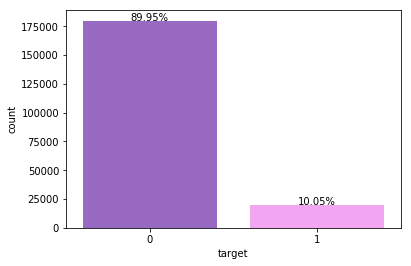

In [80]:
ax=sns.countplot(labels, palette=['#995BD0','#FF99FF'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/len(labels))*100),
            ha="center") 

In [13]:
labels.value_counts()

0    179902
1     20098
Name: target, dtype: int64

#### As we can see target labels are highly Imbalanced 

## Check Missing Values

In [14]:
mv=pd.DataFrame(data.isnull().sum(),columns=['Missing_Value'])

In [15]:
mv.head()

Missing_Value
var_0              0
var_1              0
var_2              0
var_3              0
var_4              0

In [16]:
mv.Missing_Value.value_counts()

0    200
Name: Missing_Value, dtype: int64

* There are no missing values in this dataset, it looks like that Santander already cleaned and preprocessed the data.

## Statistics of Train Data

In [17]:
data_stat=data.describe()

In [18]:
data_stat.var_6

count    200000.000000
mean          5.408949
std           0.866607
min           2.347300
25%           4.767700
50%           5.385100
75%           6.003000
max           8.447700
Name: var_6, dtype: float64

In [19]:
data_stat

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.679914      -1.627622      10.715192       6.796529   
std         3.040051       4.050044       2.640894       2.043319   
min         0.408400     -15.043400       2.117100      -0.040200   
25%         8.453850      -4.740025       8.722475       5.254075   
50%        10.524750      -1.608050      10.580000       6.825000   
75%        12.758200       1.358625      12.516700       8.324100   
max        20.315000      10.376800      19.353000      13.188300   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.078333      -5.065317       5.408949      16.545850   
std         1.623150       7.863267       0.866607       3.418076   
min         5.074800     -32.562600       2.347300       5.349700   
25%         9.883175     -11.200350       4.767700      13.943800   
50%        11.108250      -4.833150       5.385100      16.456800   
75%        12.261125       0.924800       6.003000      19.102900   
max        16.671400      17.251600       8.447700      27.691800   

               var_8          var_9      ...              var_190  \
count  200000.000000  200000.000000      ...        200000.000000   
mean        0.284162       7.567236      ...             3.234440   
std         3.332634       1.235070      ...             4.559922   
min       -10.505500       3.970500      ...           -14.093300   
25%        -2.317800       6.618800      ...            -0.058825   
50%         0.393700       7.629600      ...             3.203600   
75%         2.937900       8.584425      ...             6.406200   
max        10.151300      11.150600      ...            18.440900   

             var_191        var_192        var_193        var_194  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        7.438408       1.927839       3.331774      17.993784   
std         3.023272       1.478423       3.992030       3.135162   
min        -2.691700      -3.814500     -11.783400       8.694400   
25%         5.157400       0.889775       0.584600      15.629800   
50%         7.347750       1.901300       3.396350      17.957950   
75%         9.512525       2.949500       6.205800      20.396525   
max        16.716500       8.402400      18.281800      27.928800   

             var_195        var_196        var_197        var_198  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -0.142088       2.303335       8.908158      15.870720   
std         1.429372       5.454369       0.921625       3.010945   
min        -5.261000     -14.209600       5.960600       6.299300   
25%        -1.170700      -1.946925       8.252800      13.829700   
50%        -0.172700       2.408900       8.888200      15.934050   
75%         0.829600       6.556725       9.593300      18.064725   
max         4.272900      18.321500      12.000400      26.079100   

             var_199  
count  200000.000000  
mean       -3.326537  
std        10.438015  
min       -38.852800  
25%       -11.208475  
50%        -2.819550  
75%         4.836800  
max        28.500700  

[8 rows x 200 columns]

## Box Plots of Each Feature

In [30]:
variables = data.columns
n = 10
chunks = [variables[x:x + n] for x in range(0, len(variables), n)]

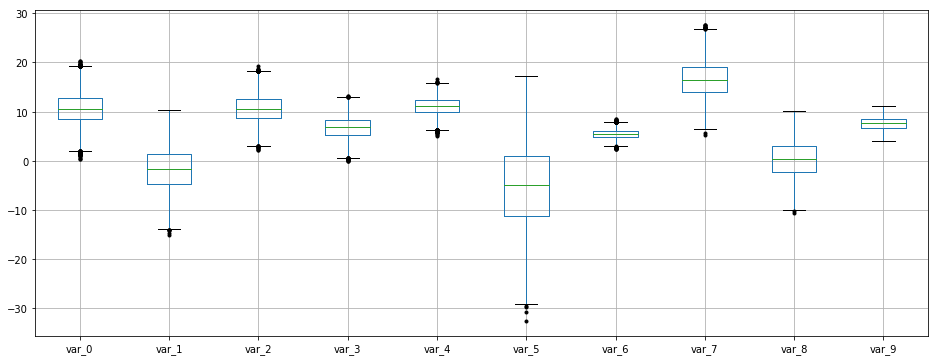

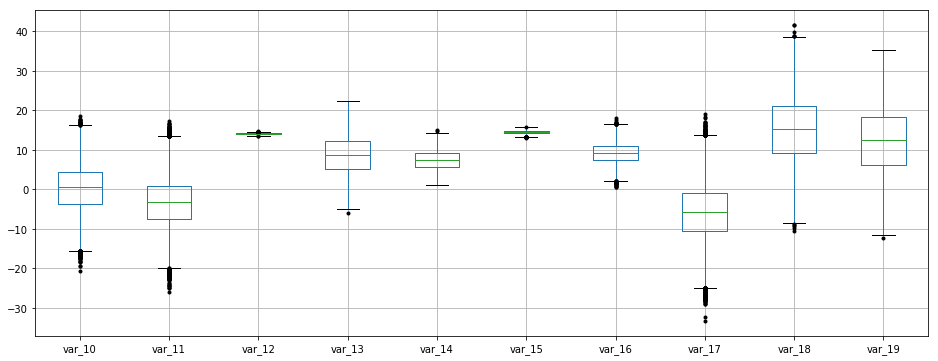

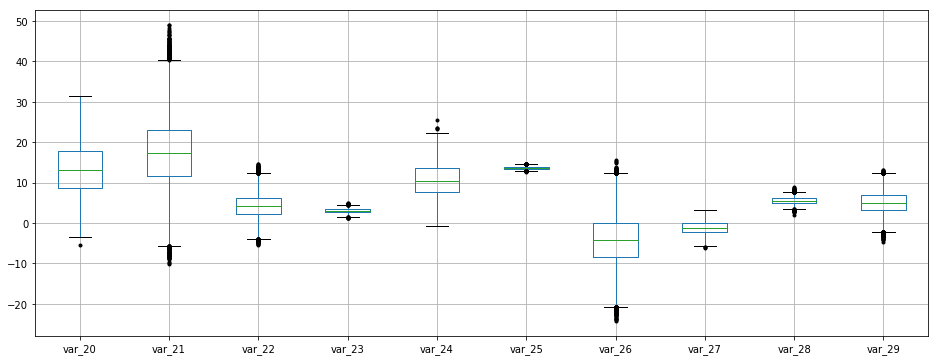

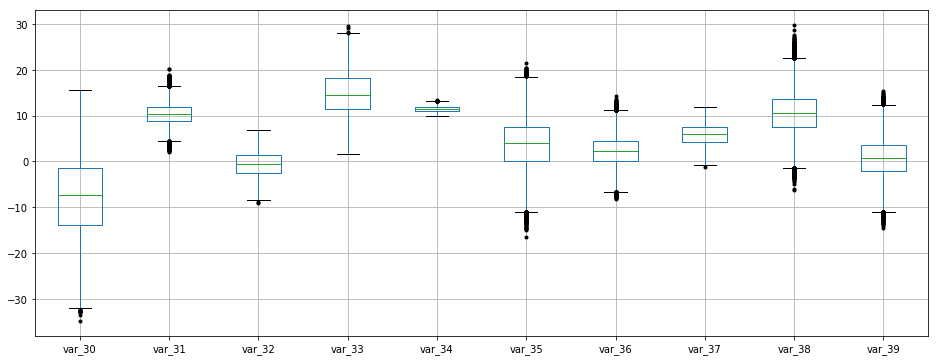

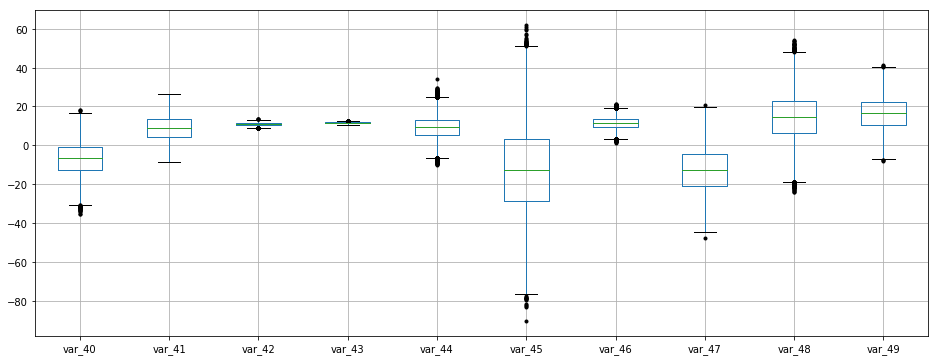

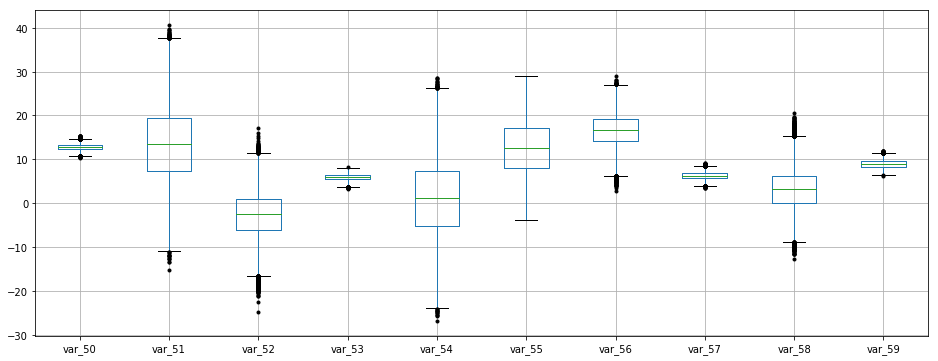

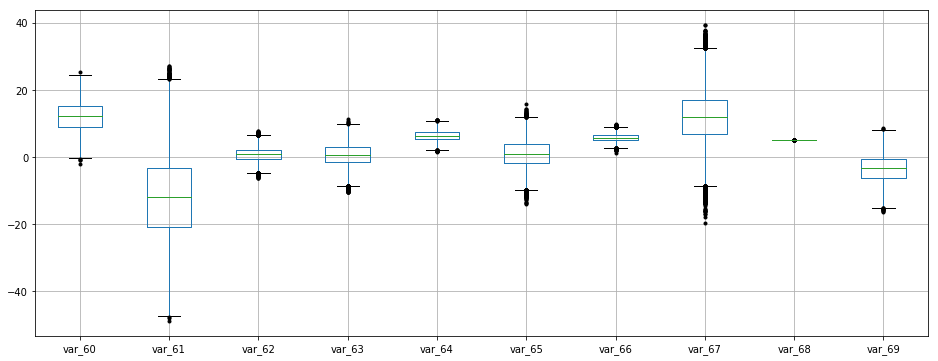

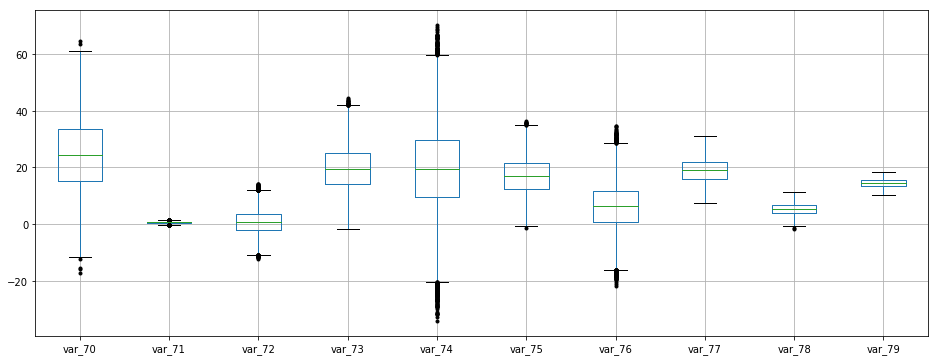

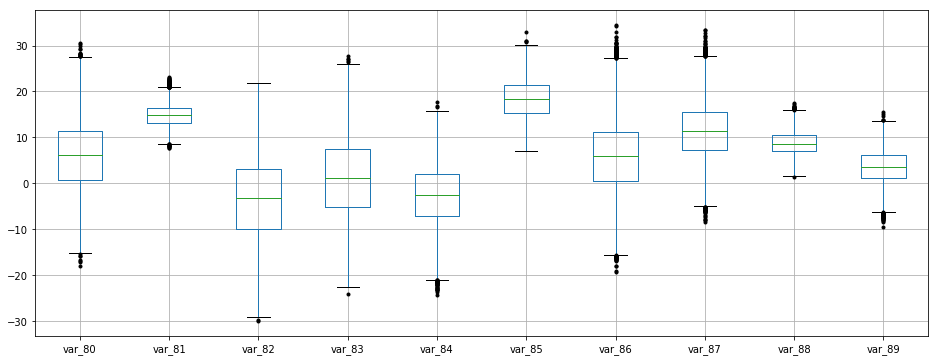

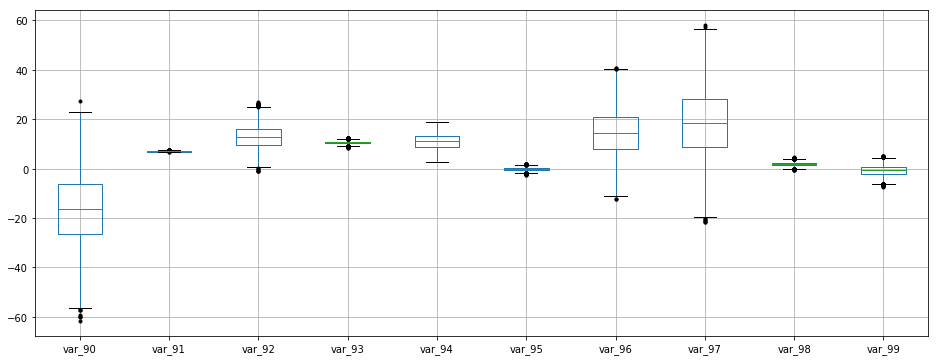

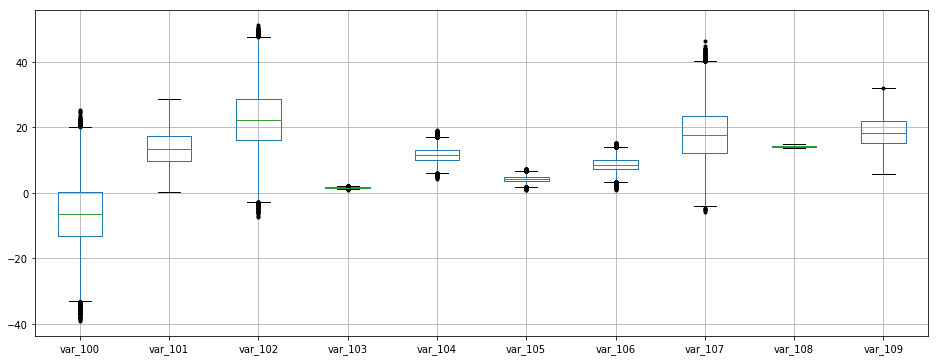

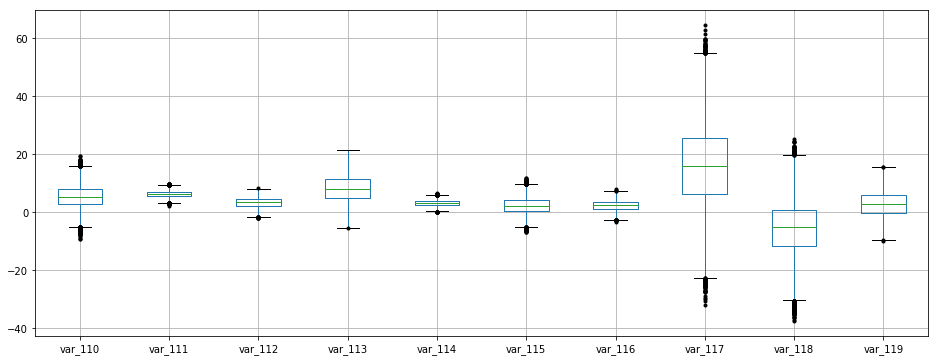

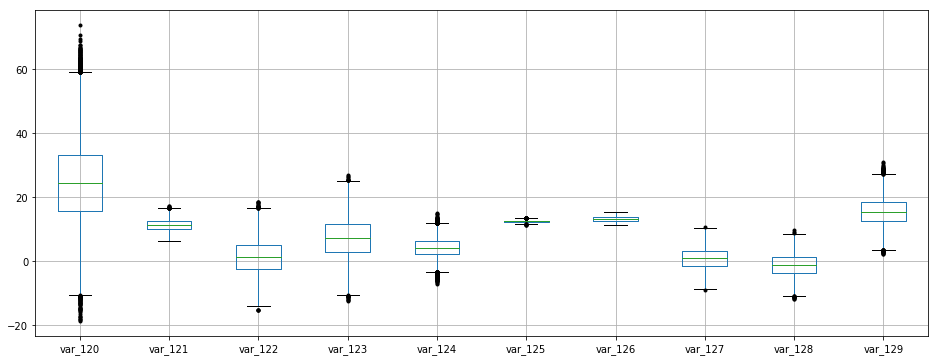

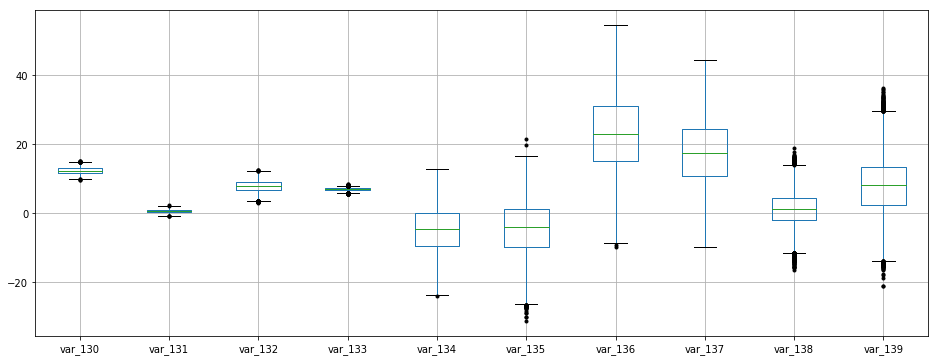

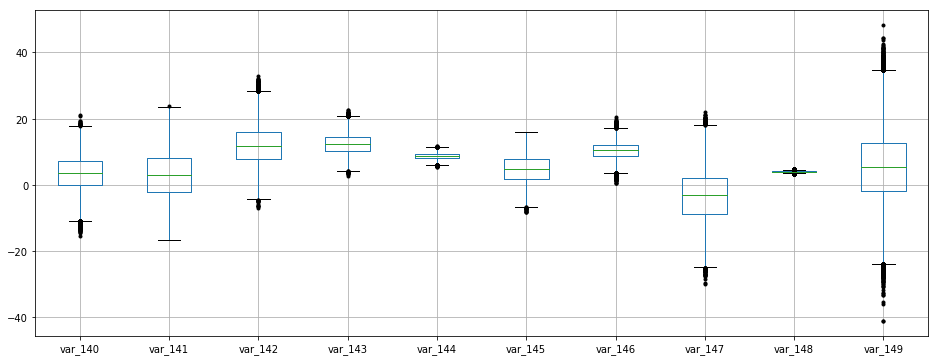

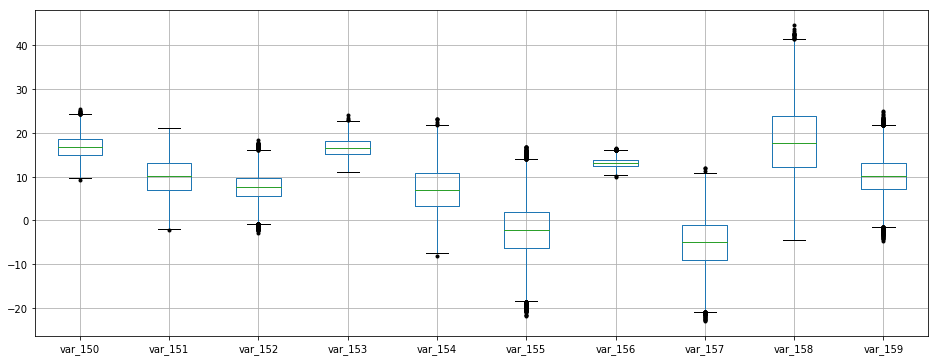

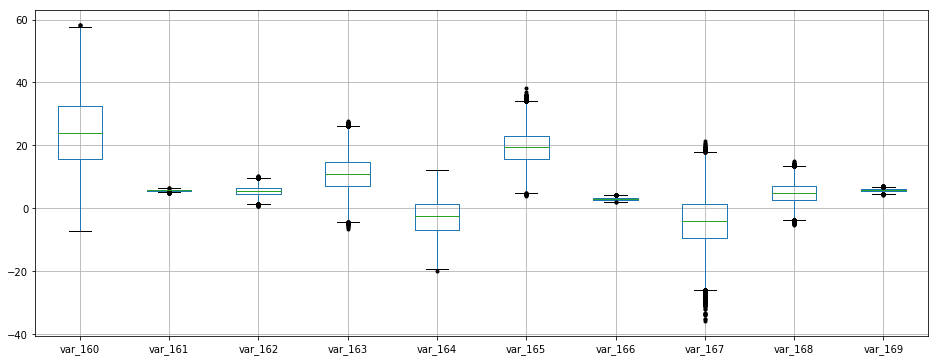

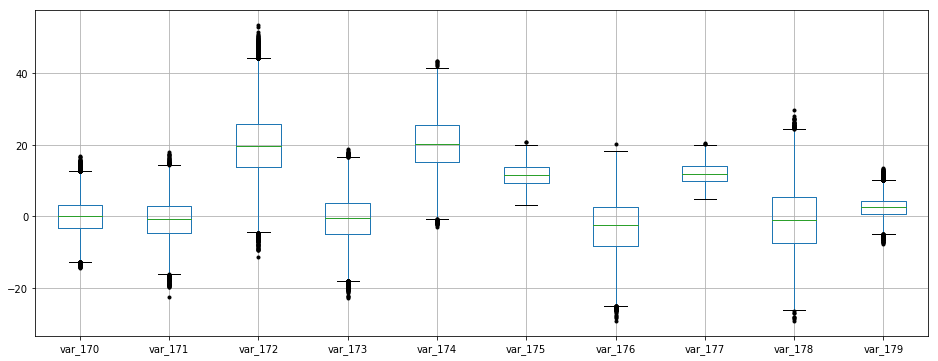

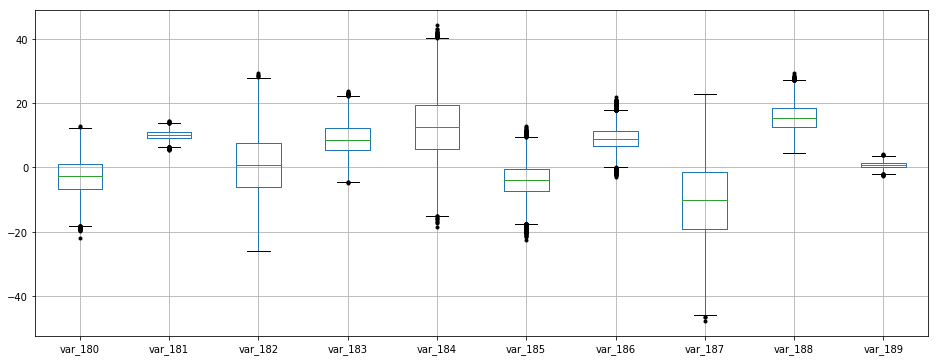

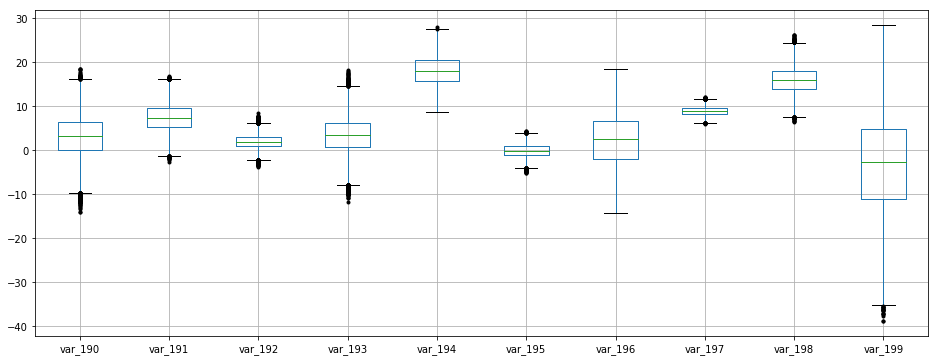

In [35]:
for i in chunks:
    plt.show(data.boxplot(column = list(i), sym='k.', figsize=(16,6)))

* As we can see there are not many outliers in these features

## Distribution of Each Feature with Target Variables

In [26]:
features=data.columns

In [27]:
df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266   ...      4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338   ...      7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155   ...      2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250   ...      4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


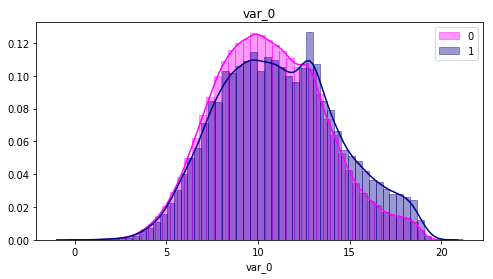

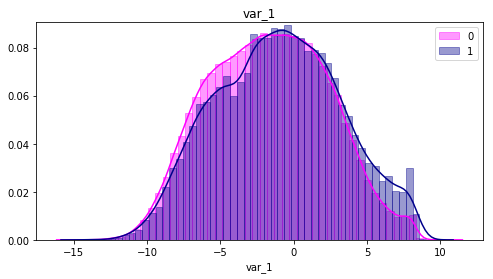

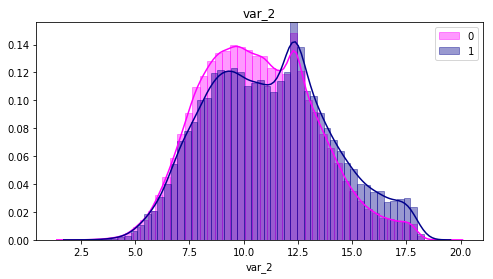

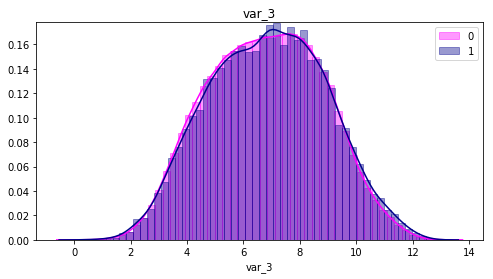

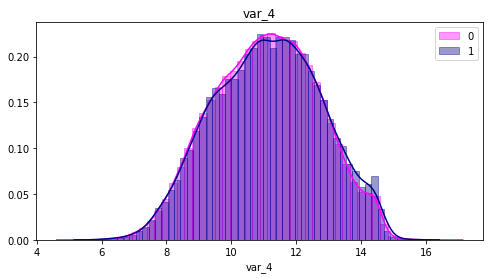

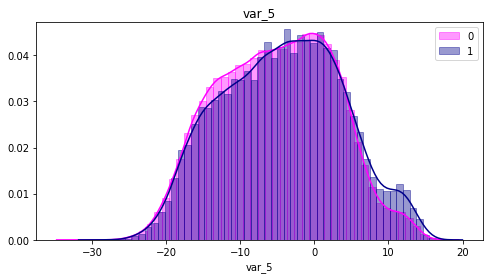

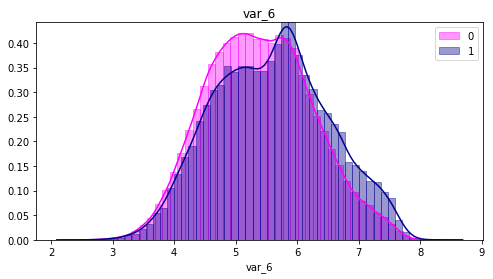

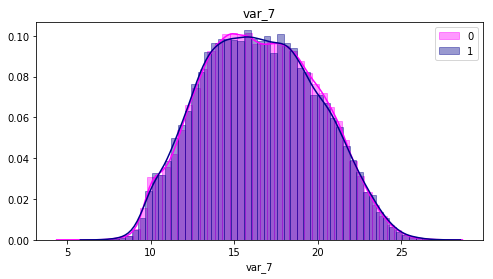

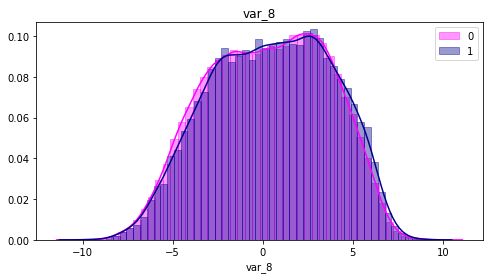

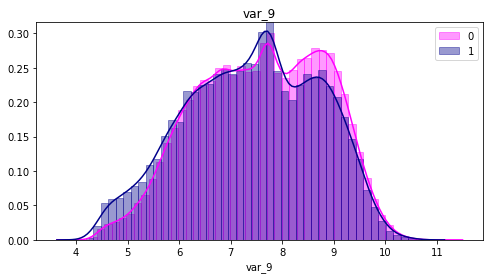

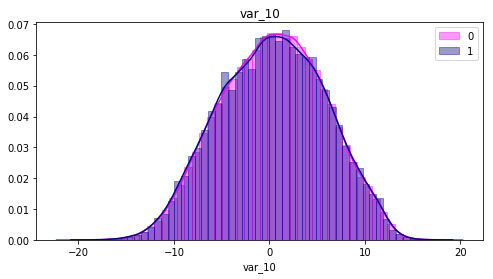

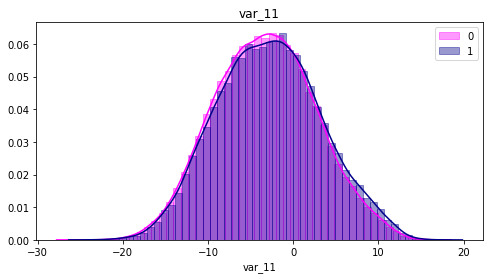

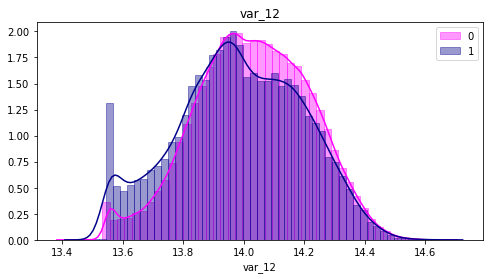

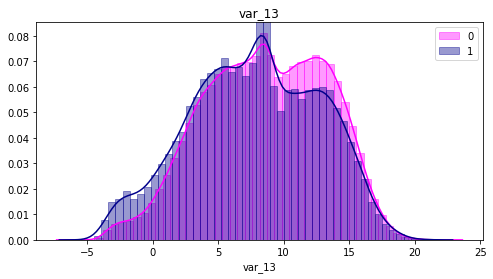

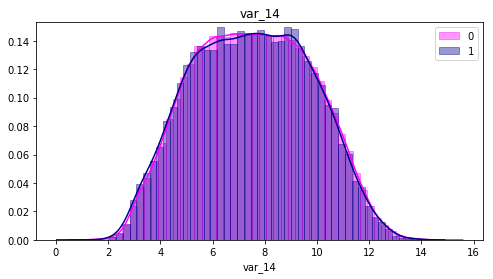

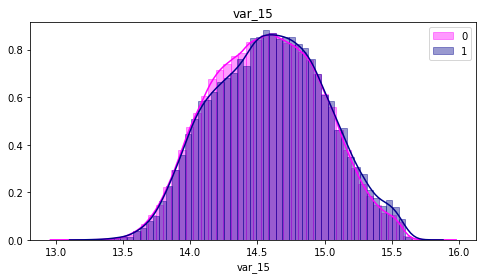

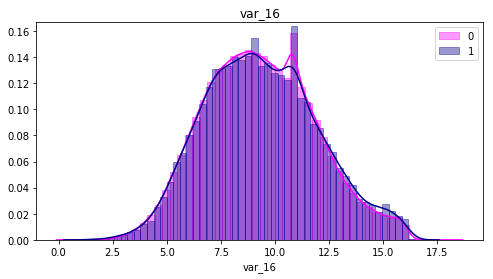

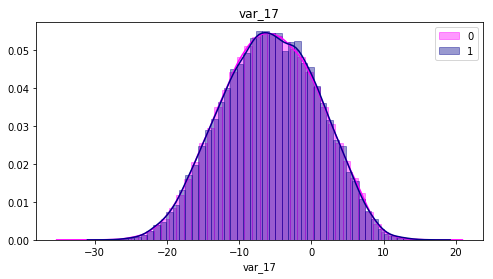

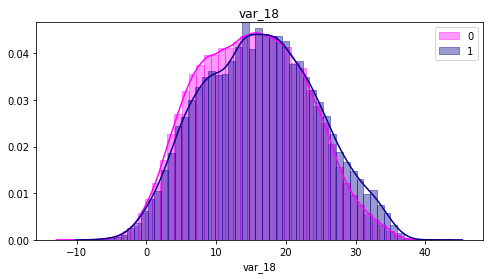

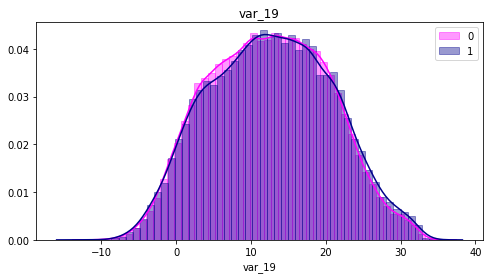

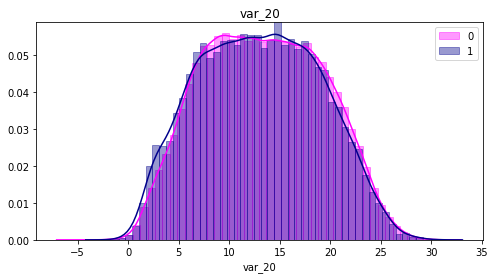

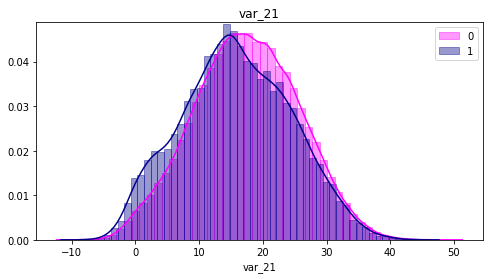

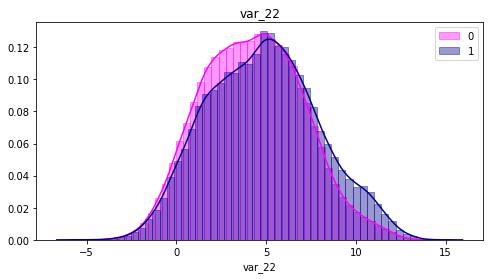

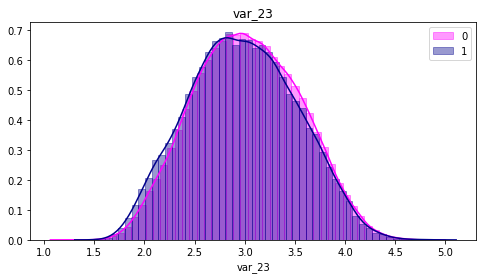

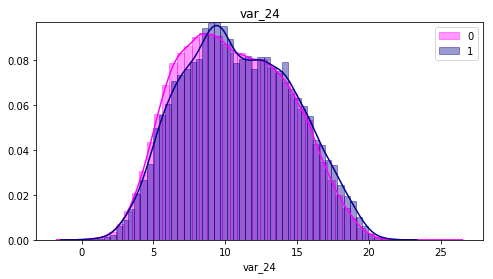

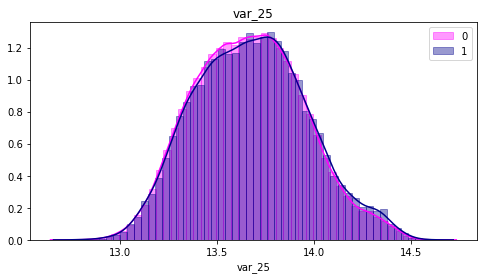

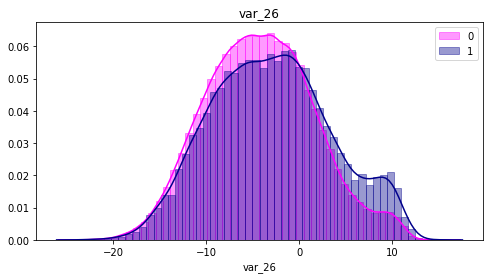

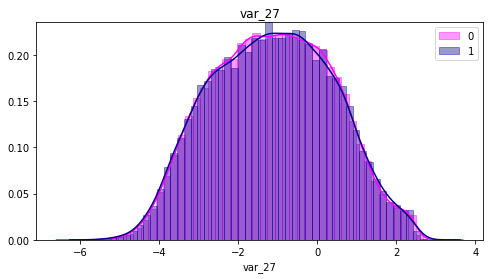

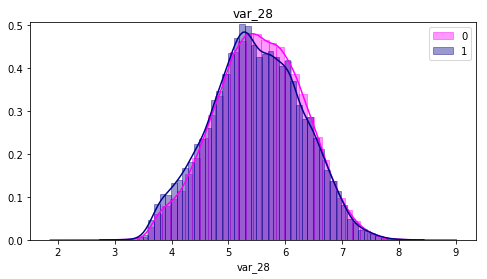

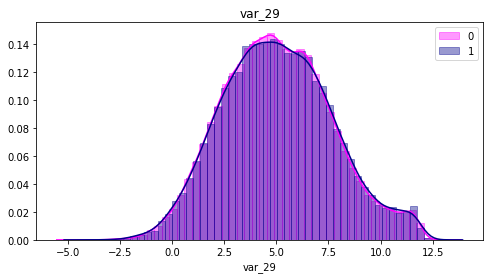

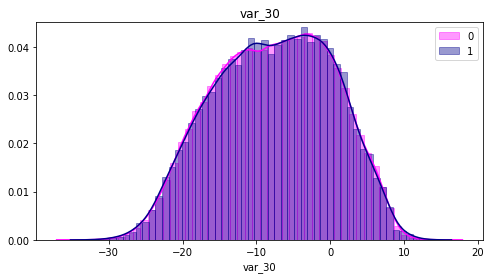

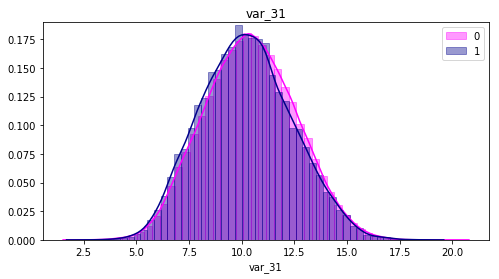

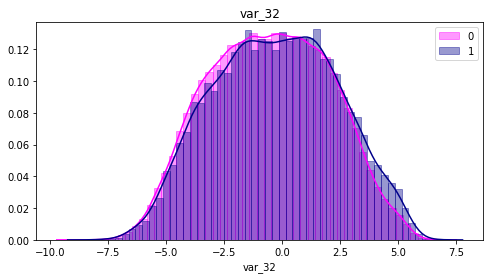

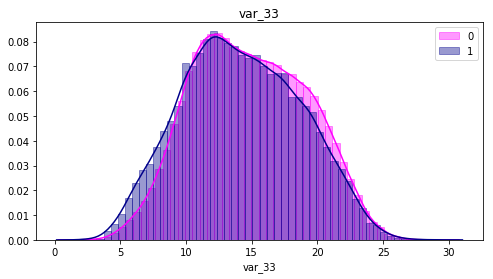

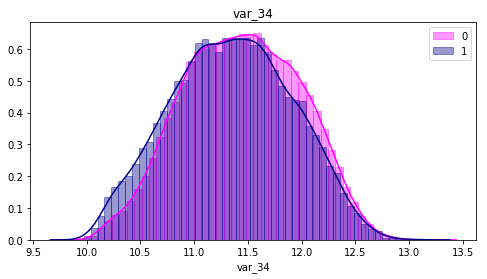

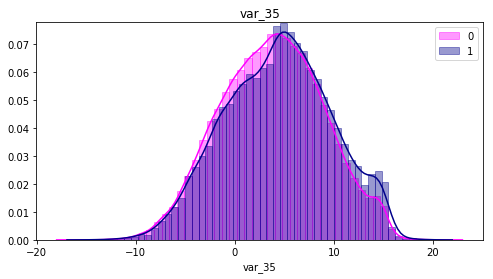

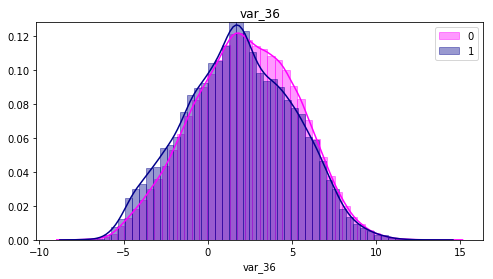

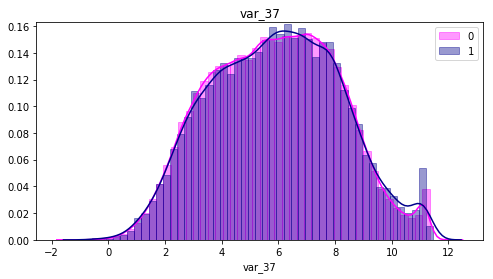

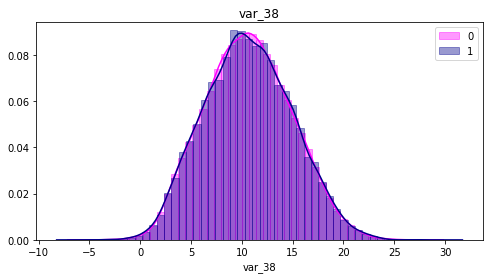

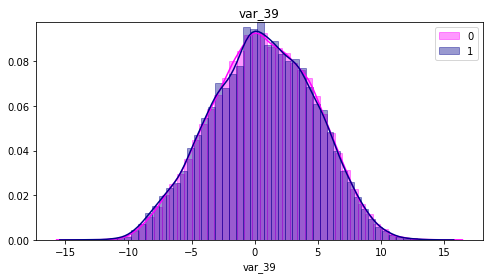

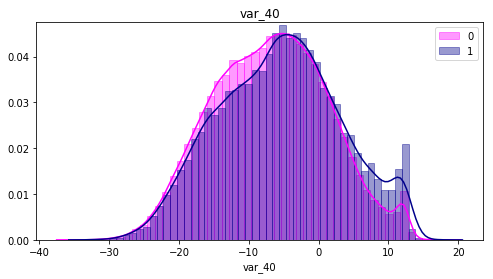

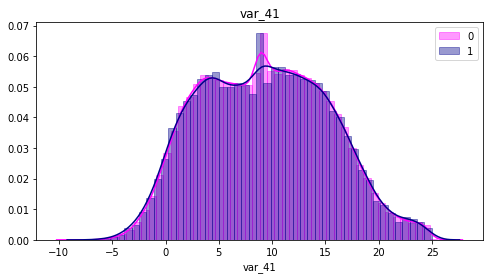

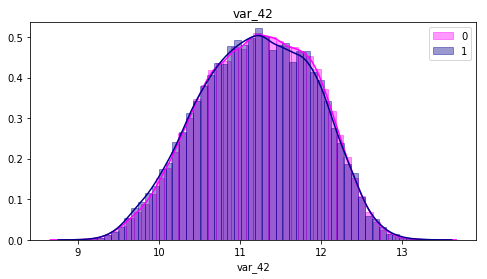

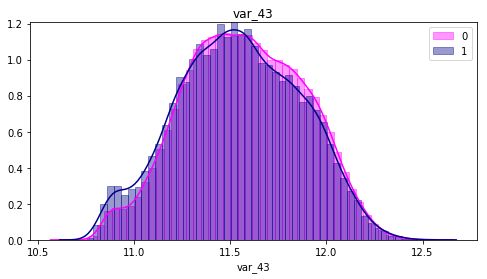

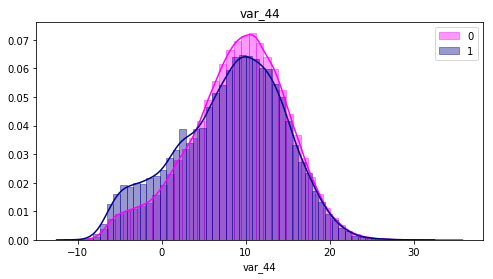

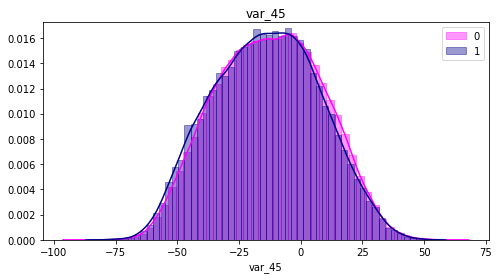

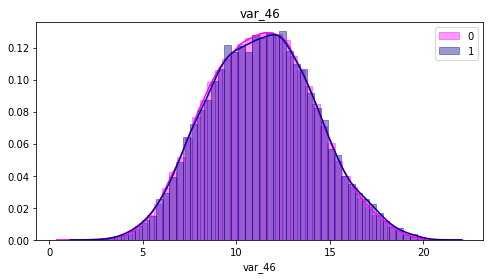

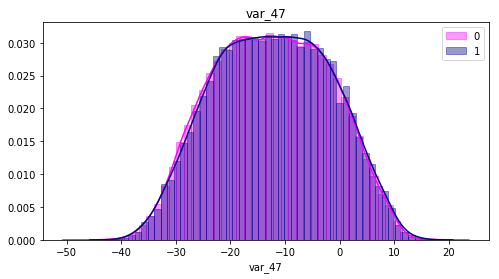

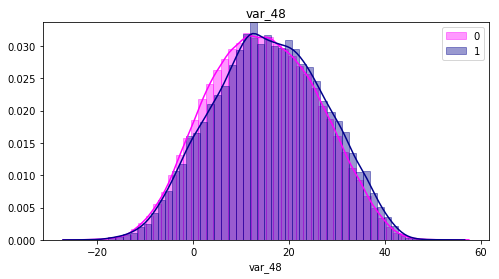

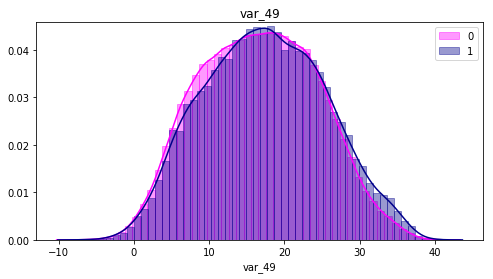

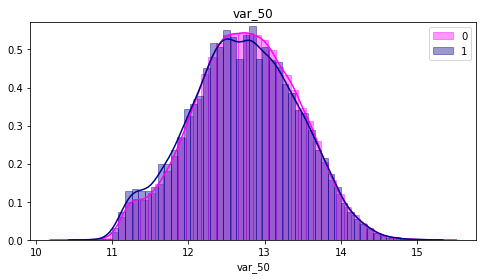

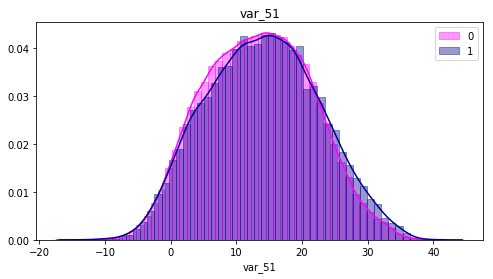

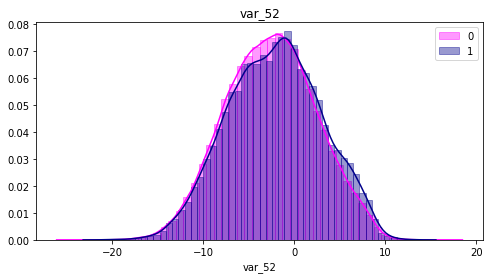

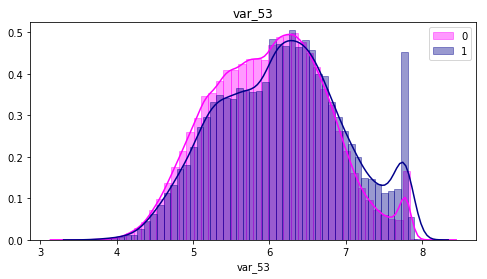

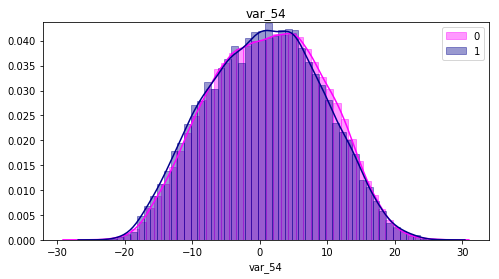

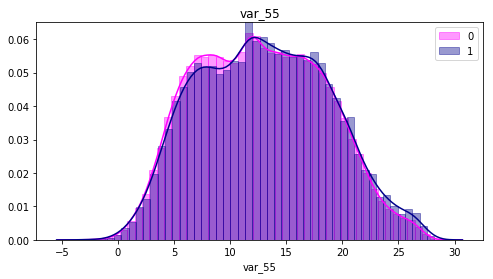

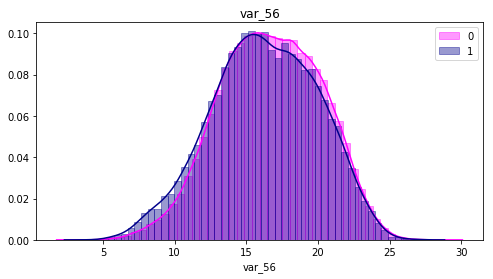

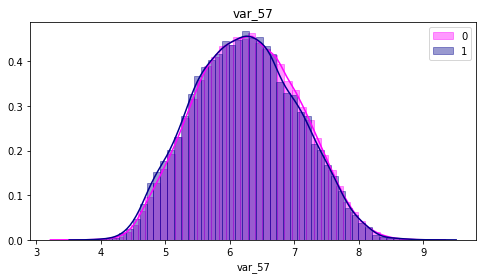

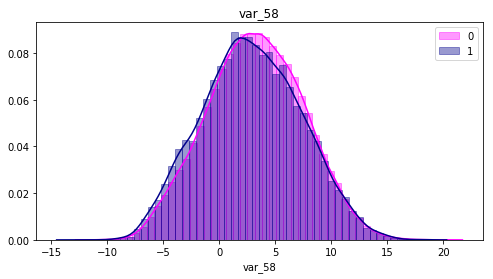

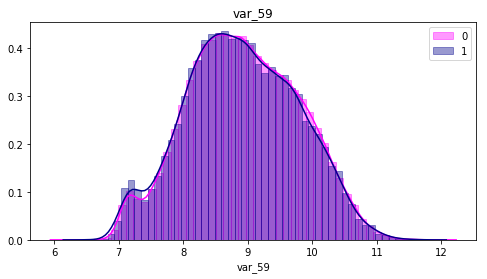

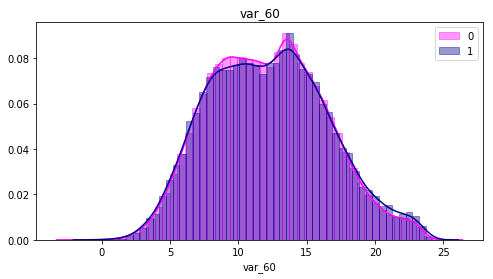

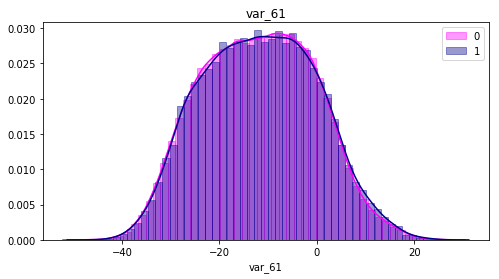

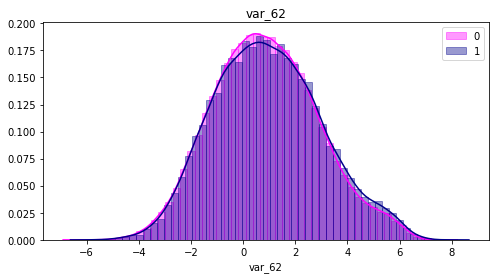

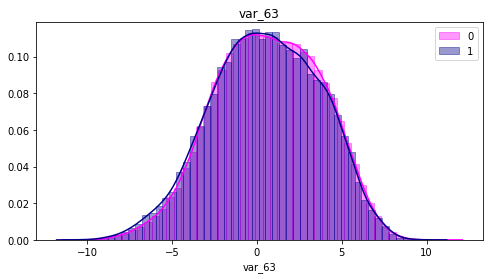

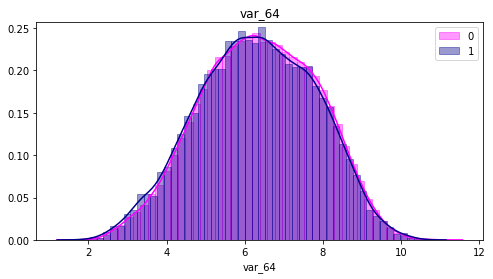

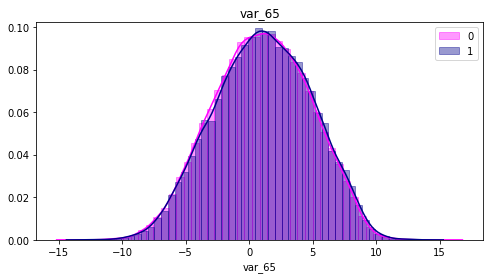

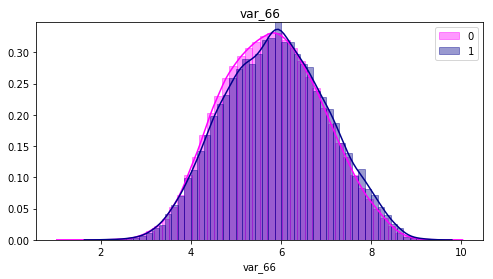

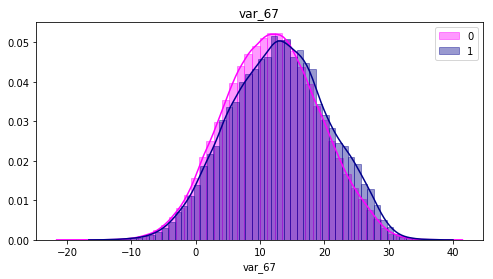

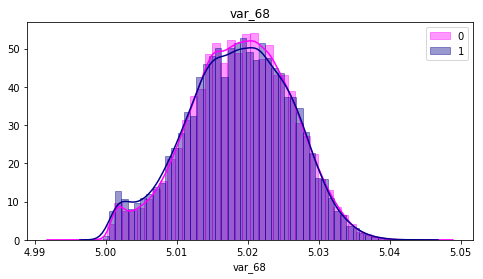

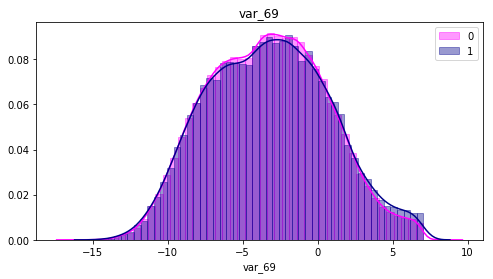

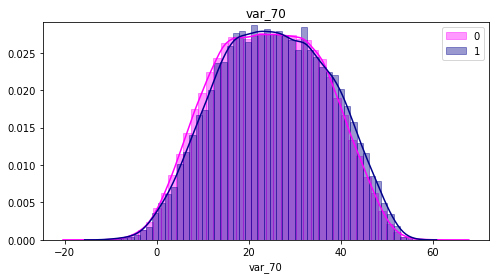

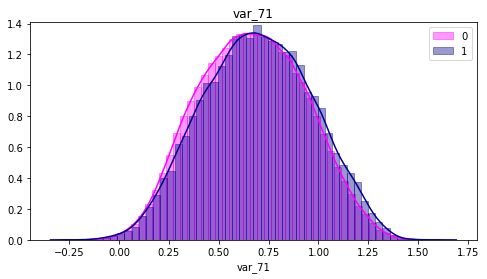

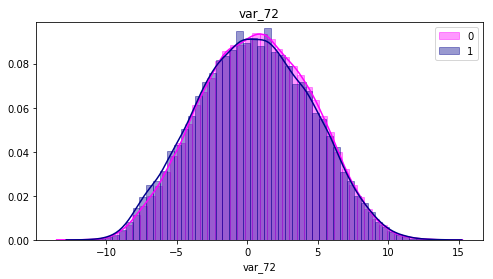

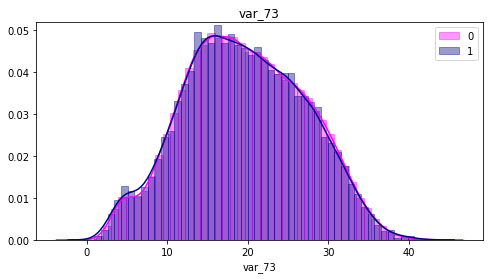

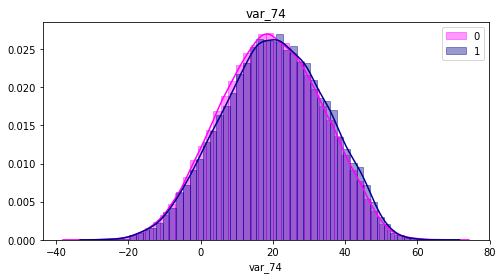

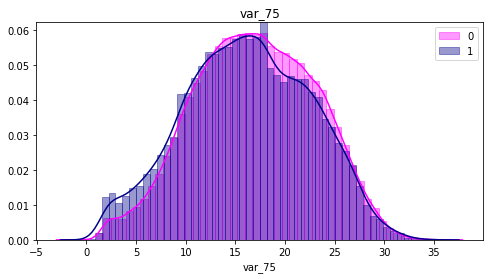

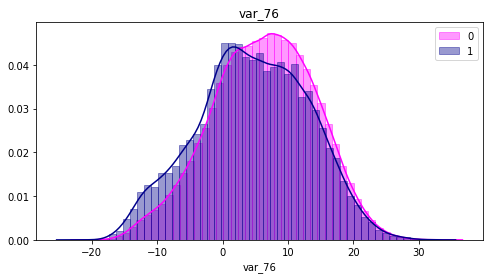

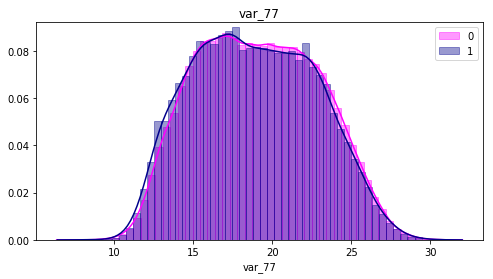

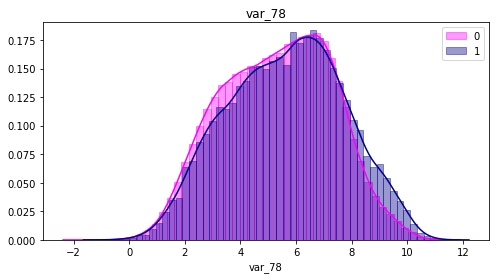

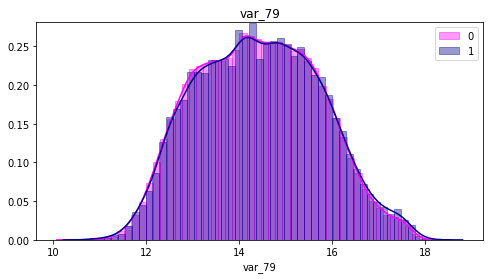

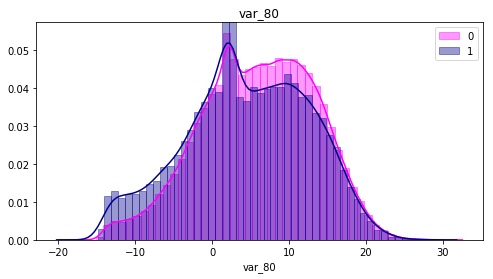

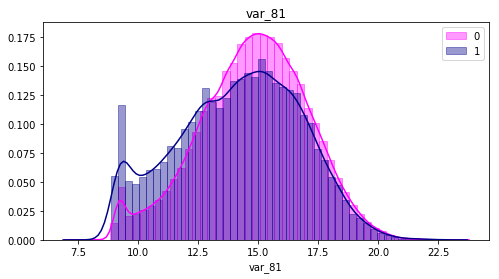

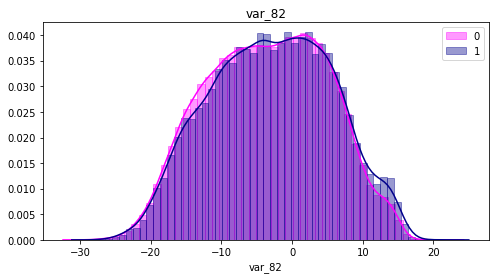

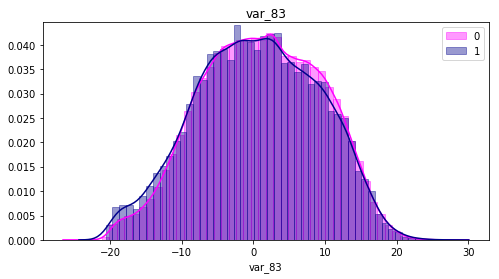

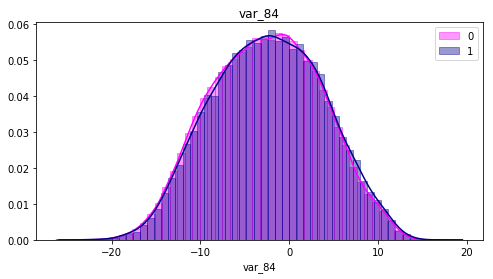

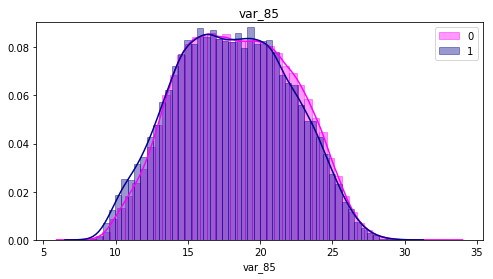

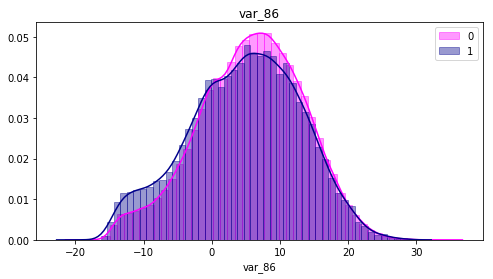

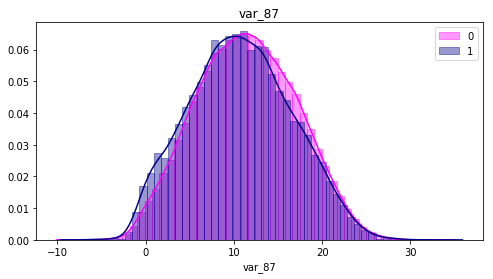

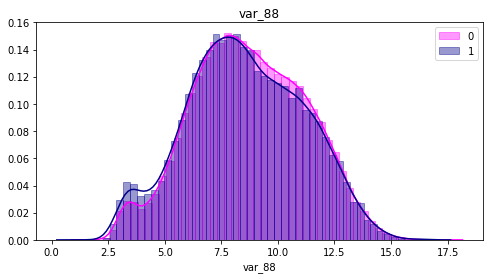

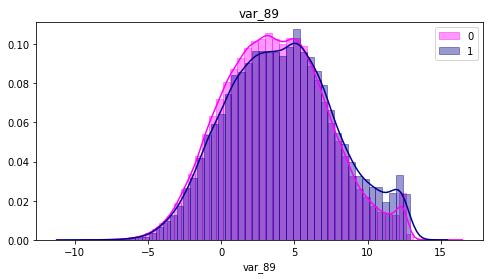

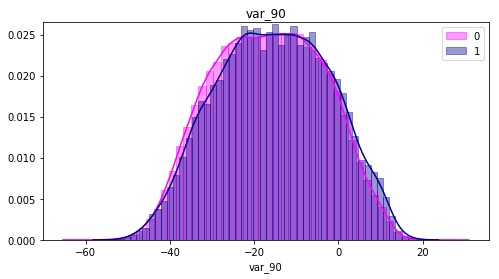

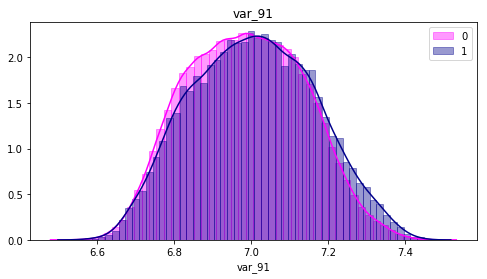

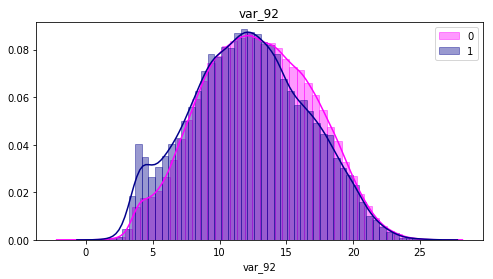

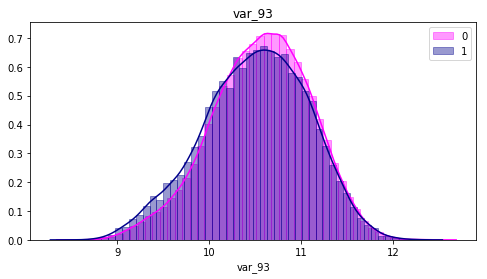

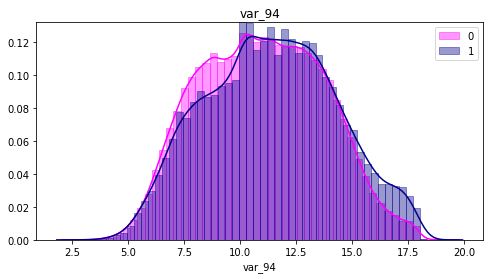

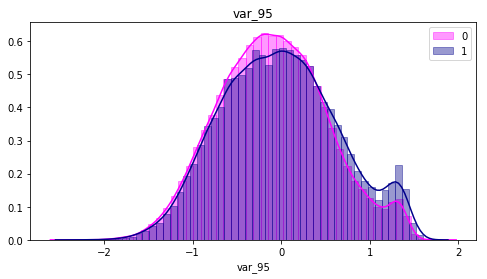

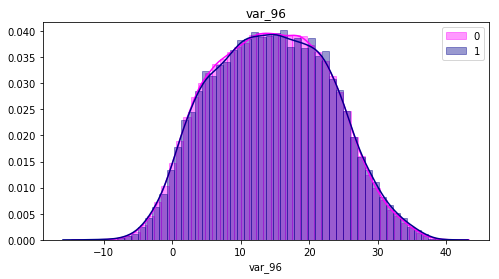

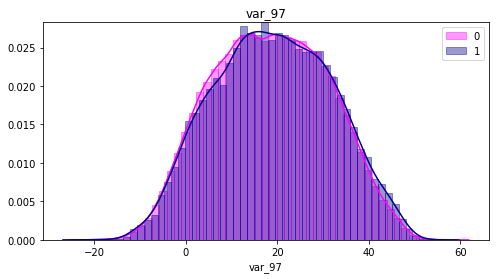

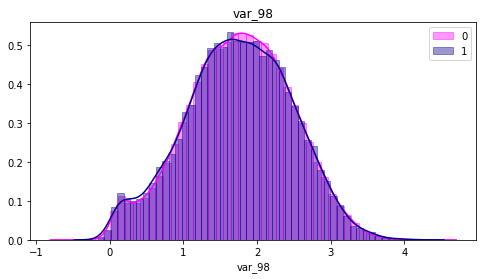

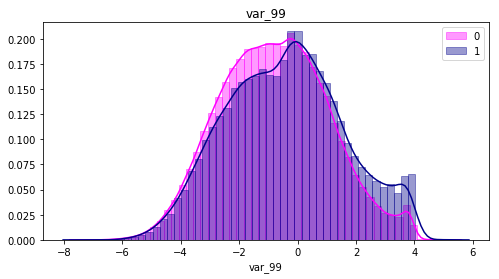

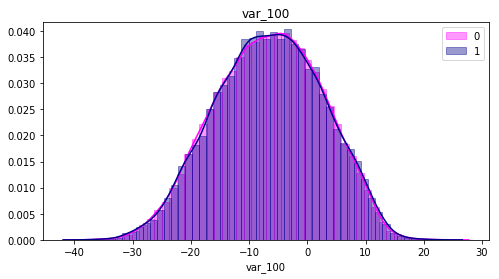

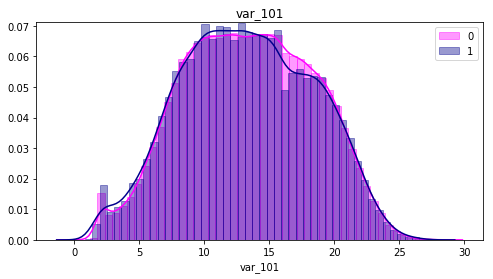

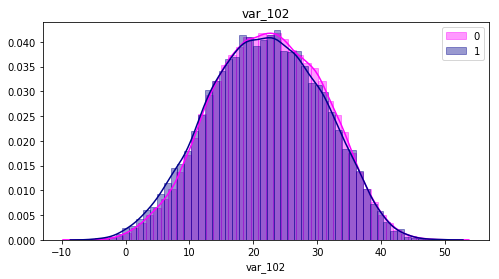

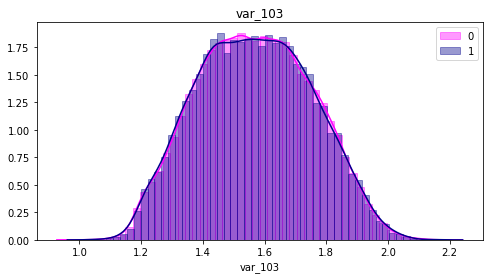

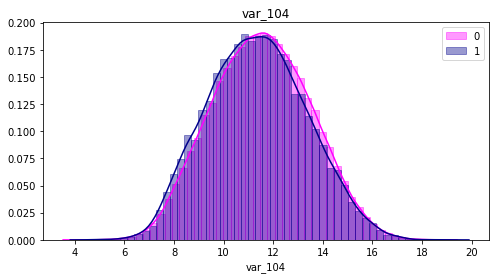

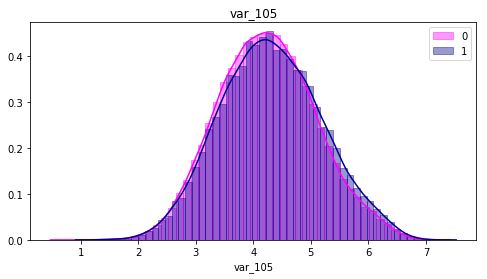

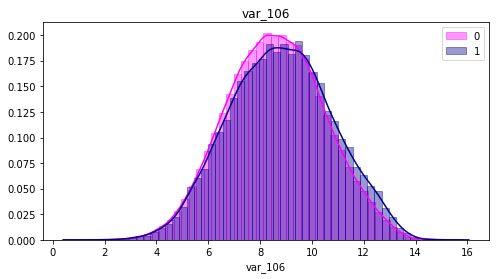

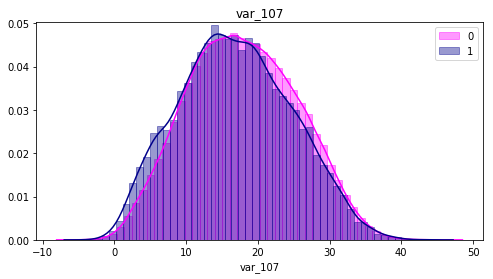

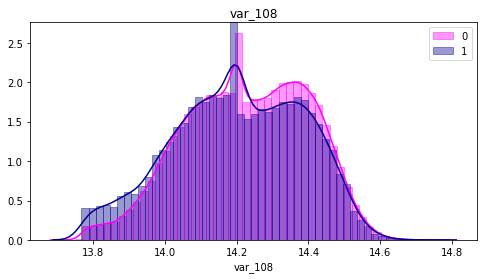

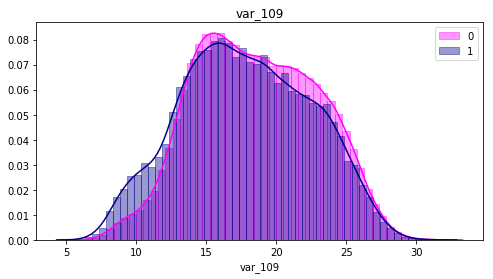

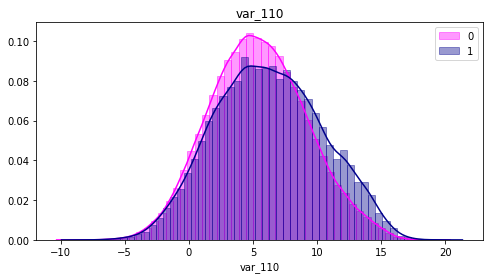

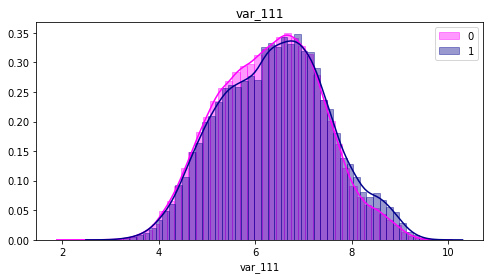

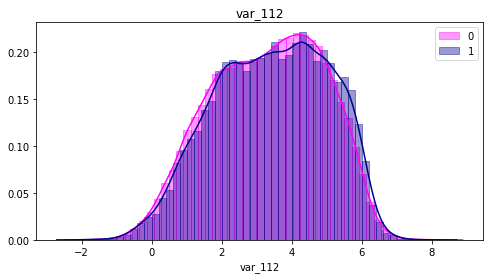

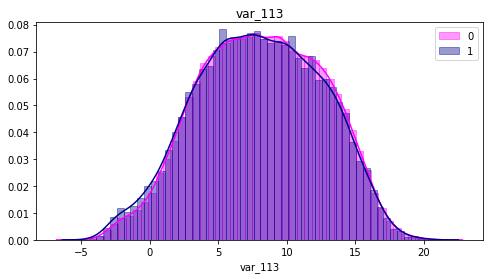

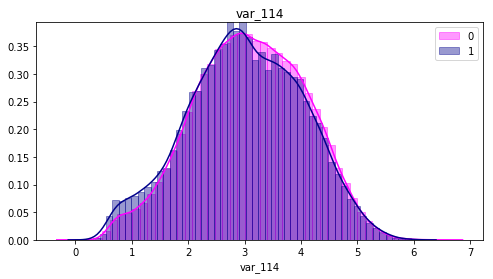

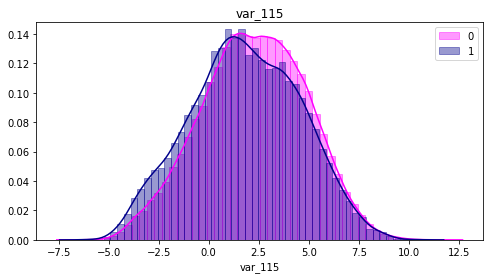

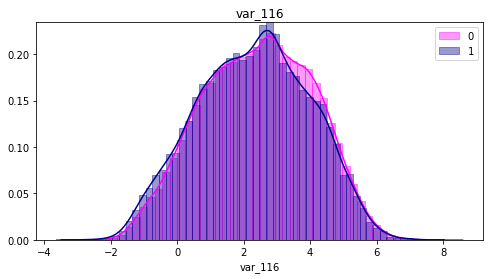

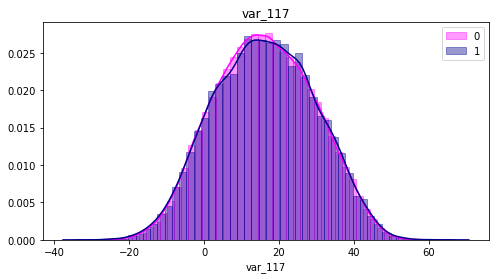

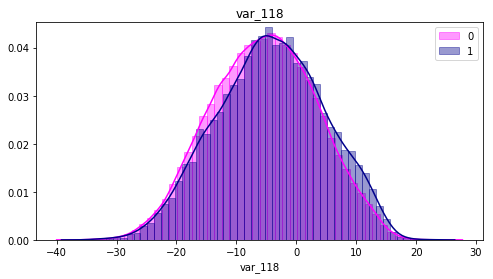

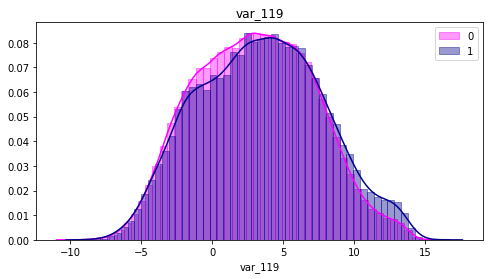

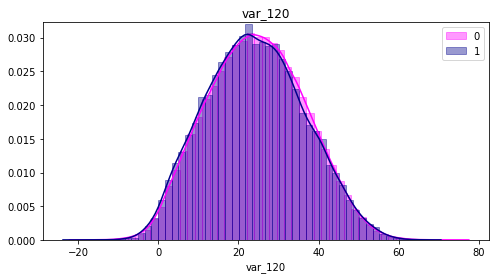

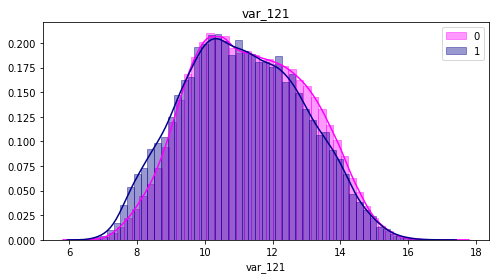

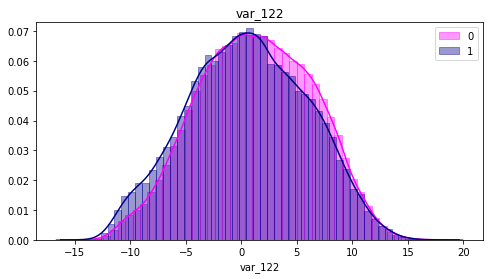

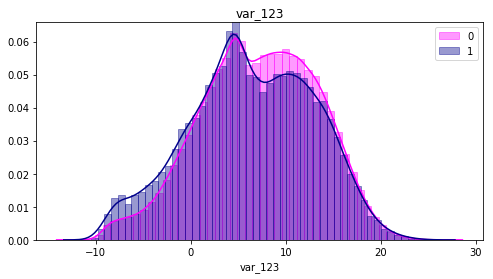

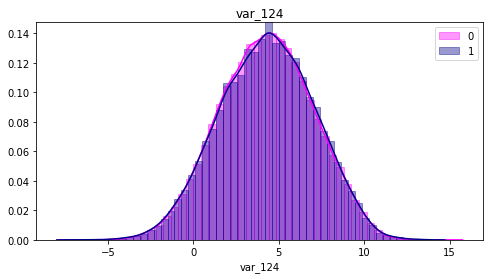

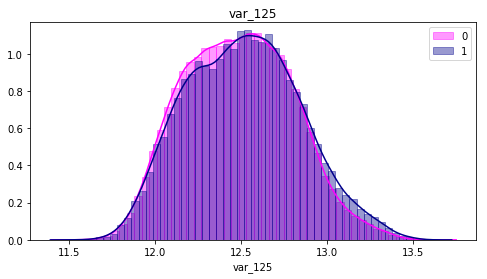

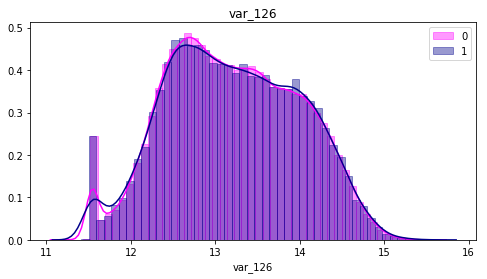

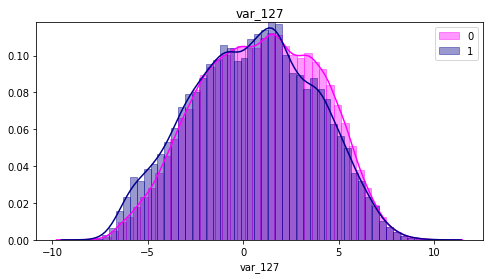

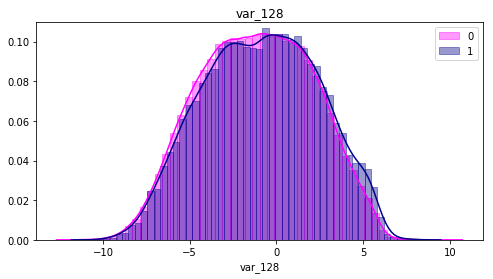

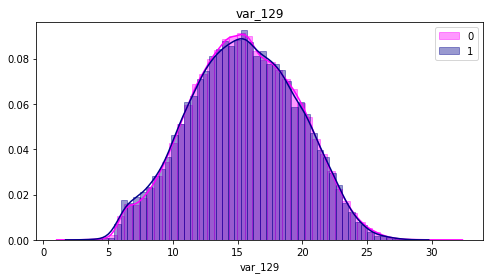

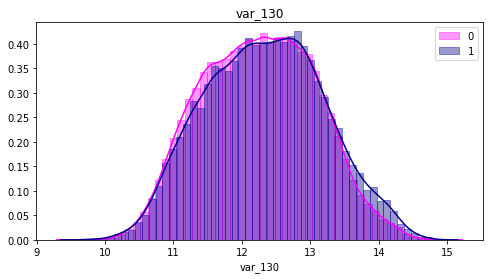

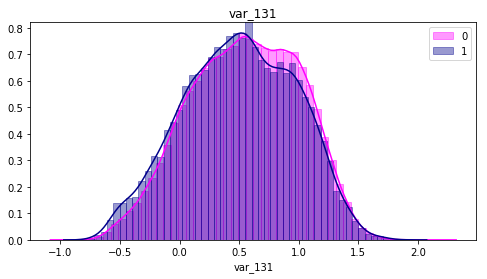

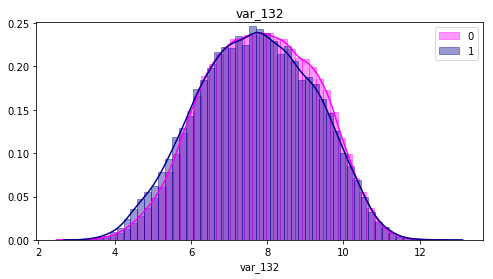

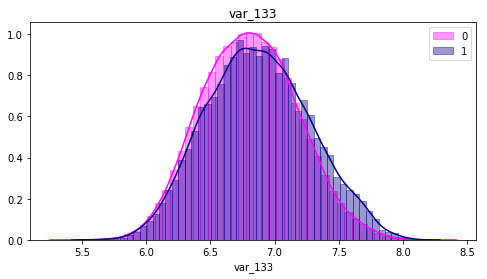

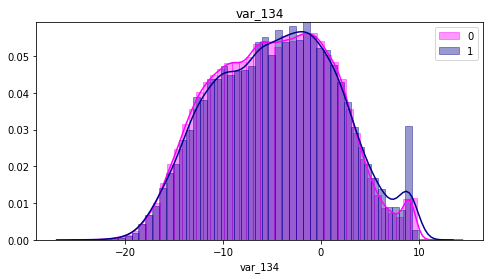

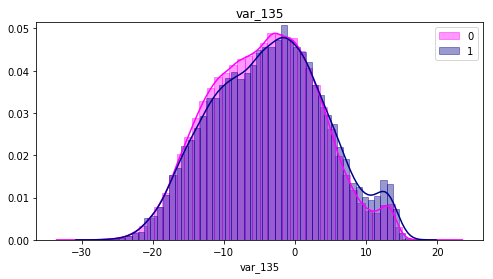

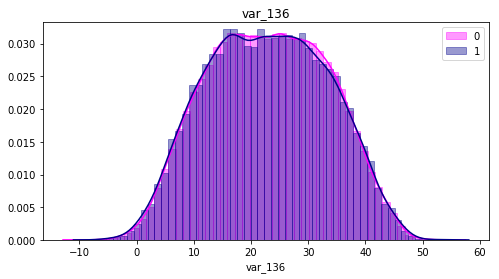

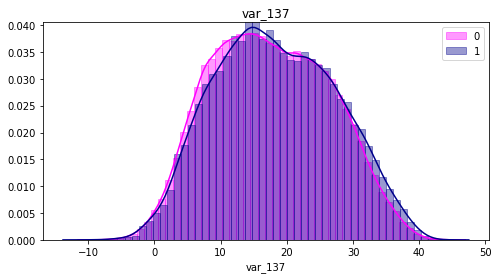

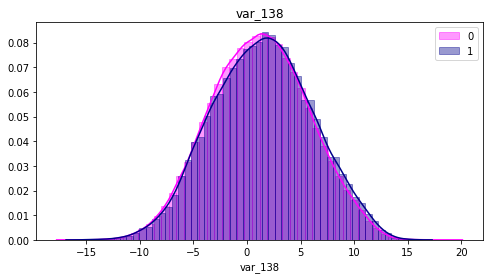

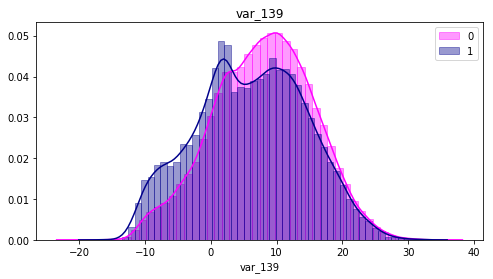

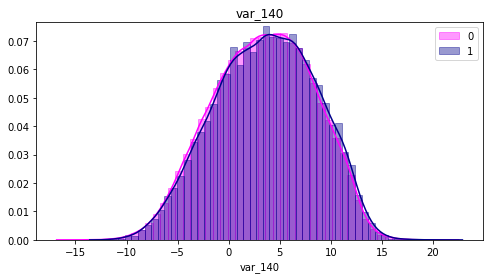

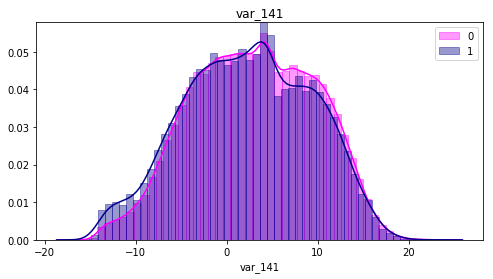

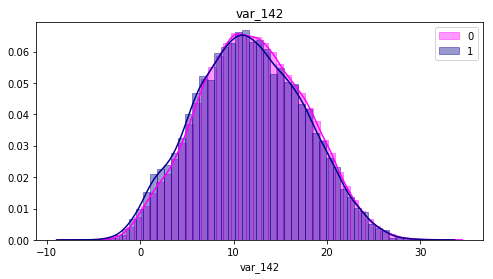

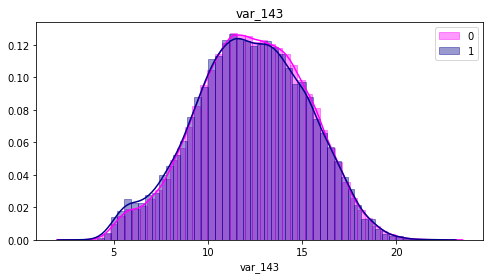

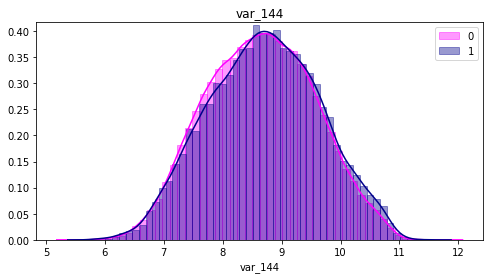

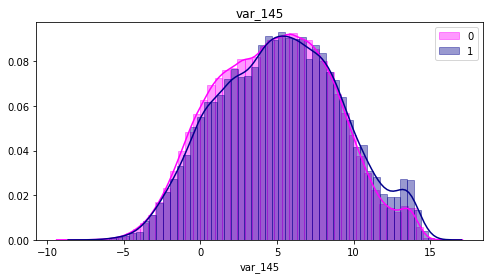

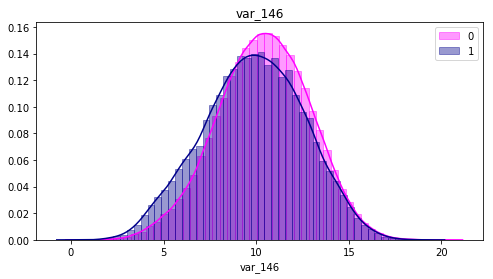

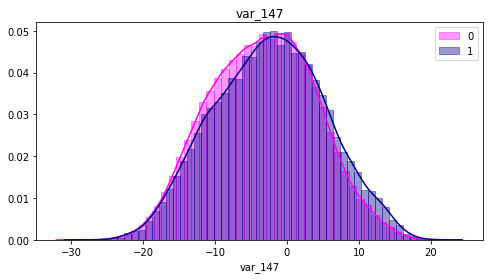

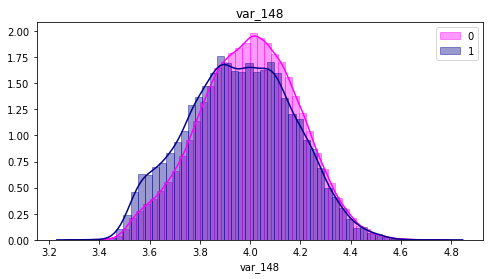

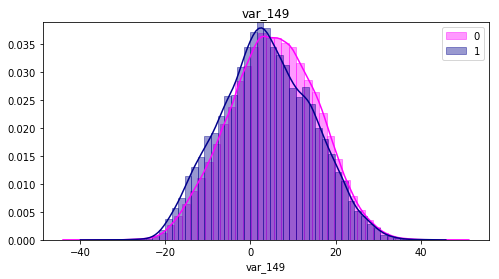

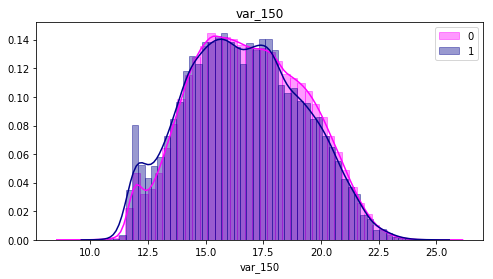

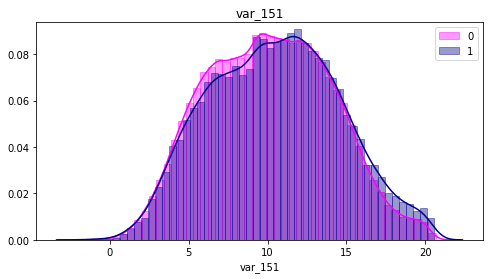

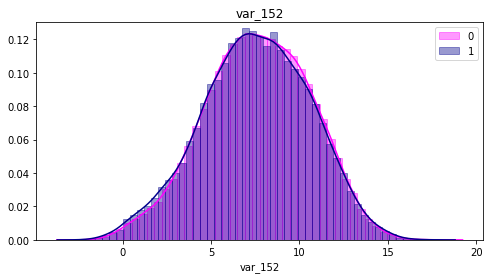

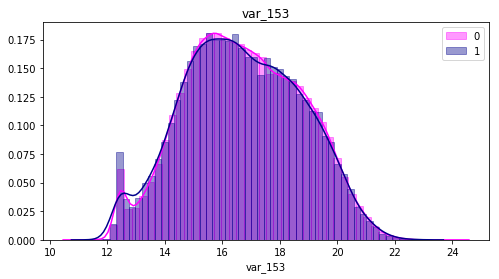

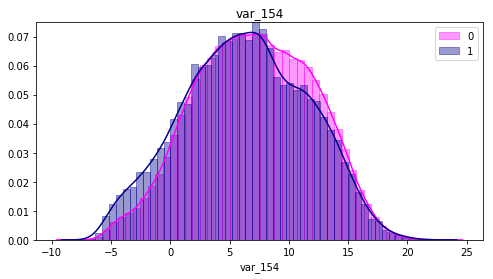

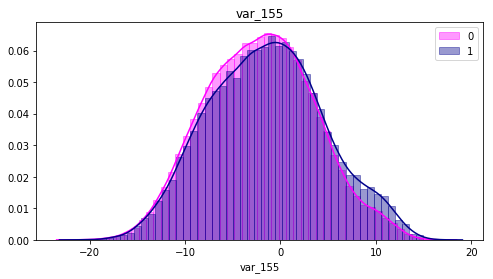

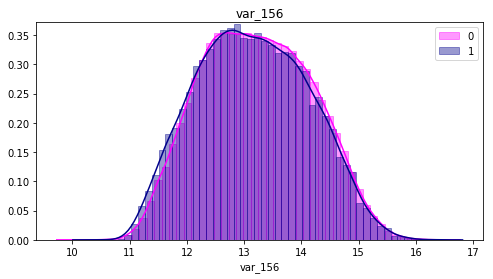

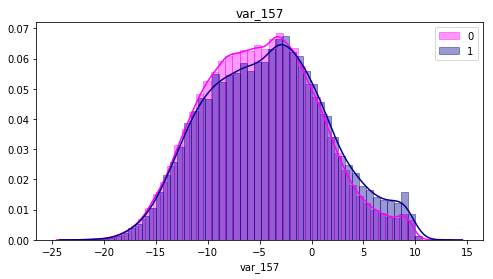

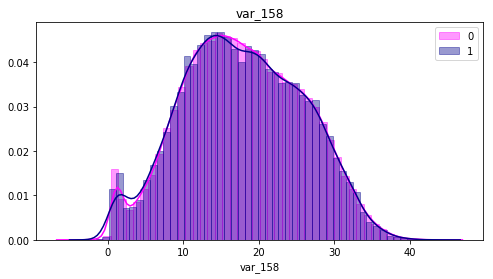

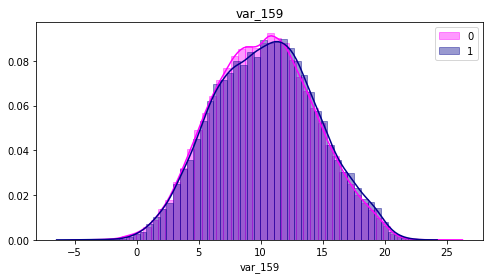

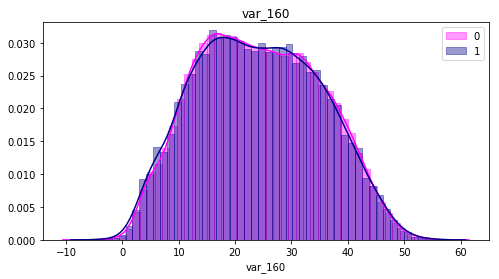

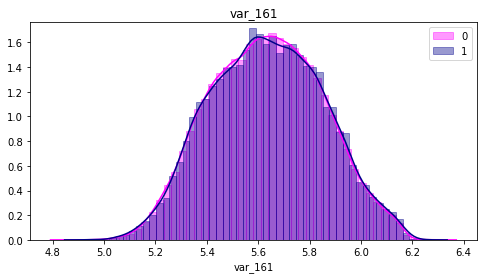

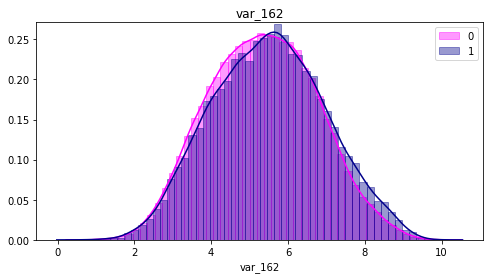

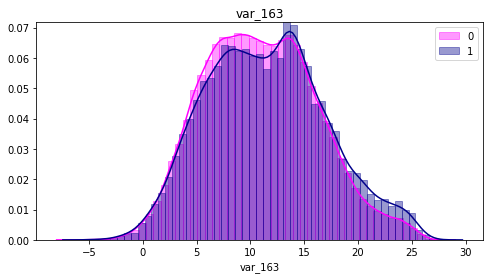

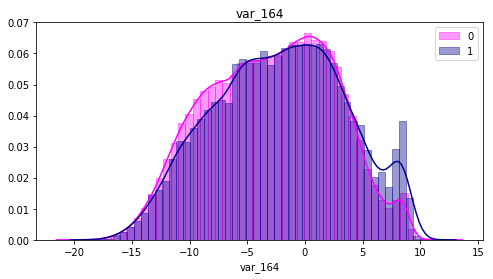

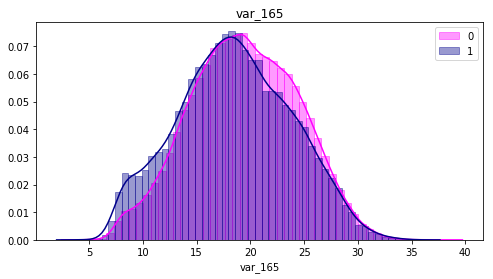

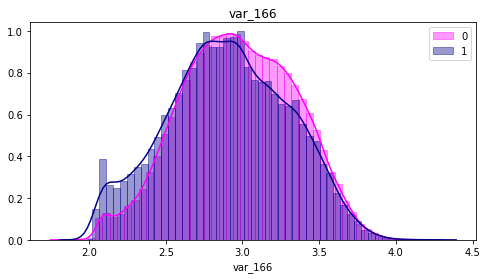

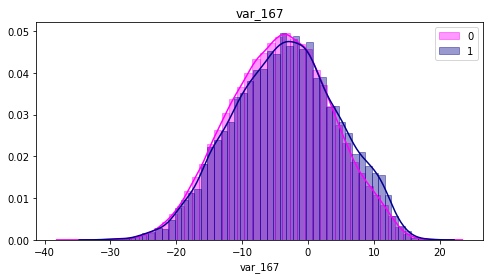

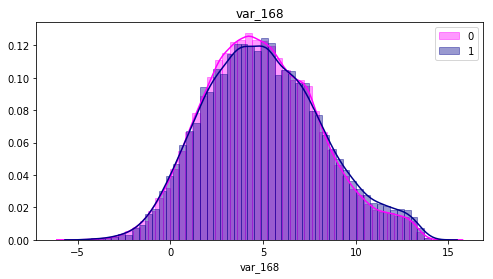

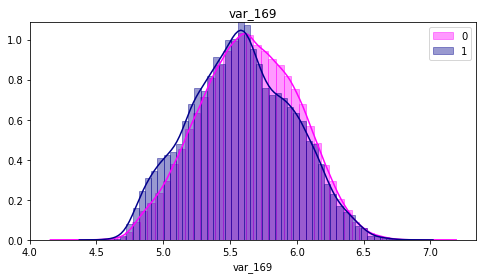

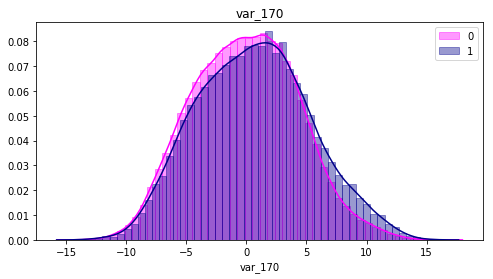

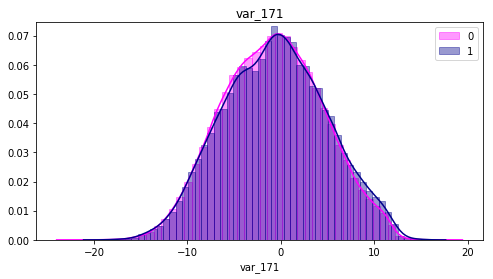

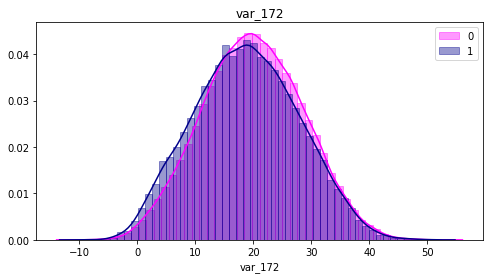

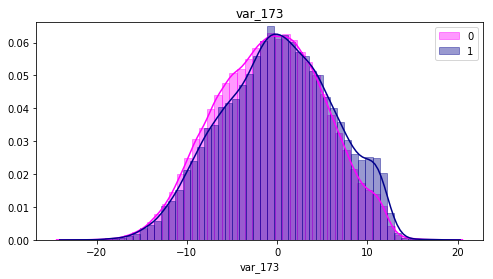

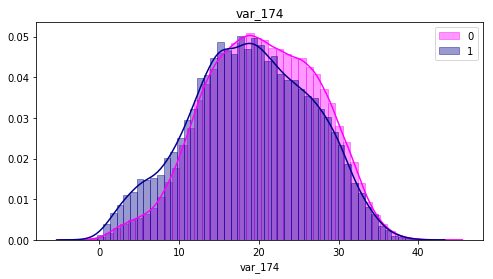

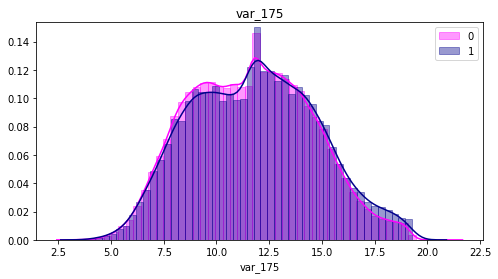

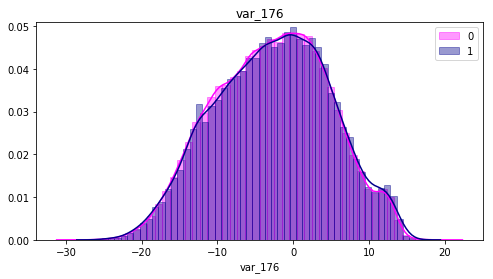

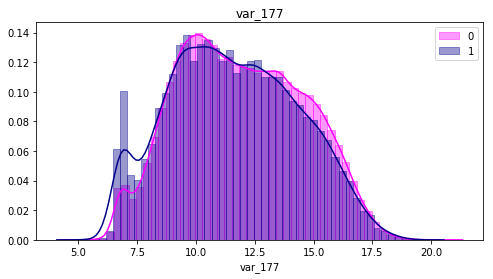

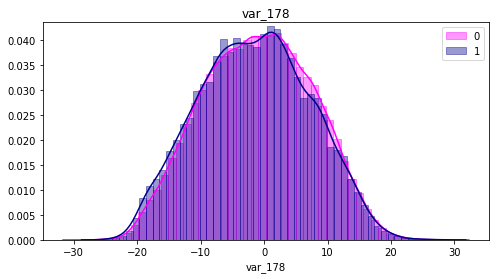

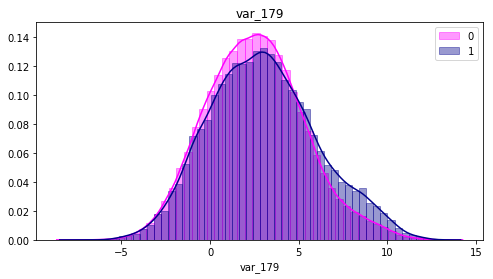

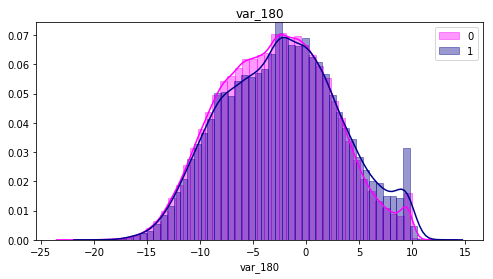

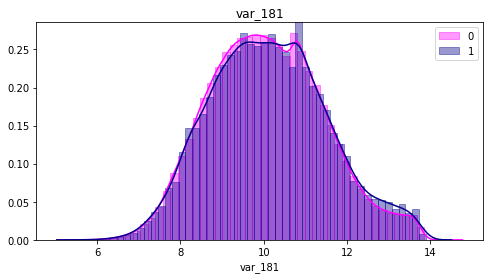

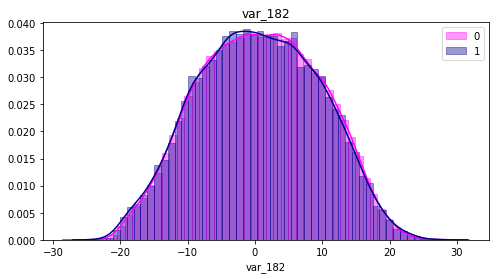

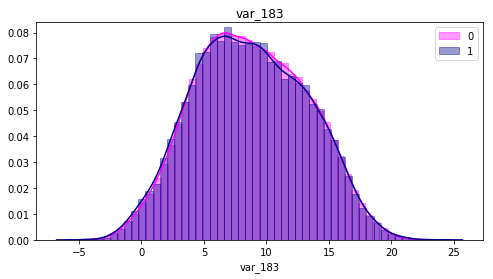

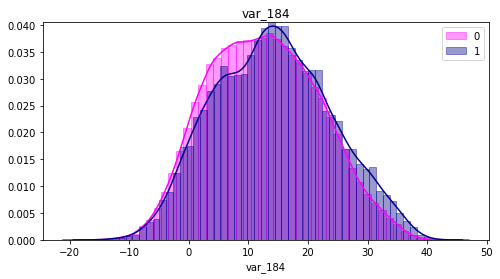

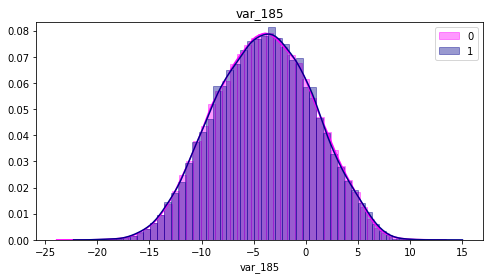

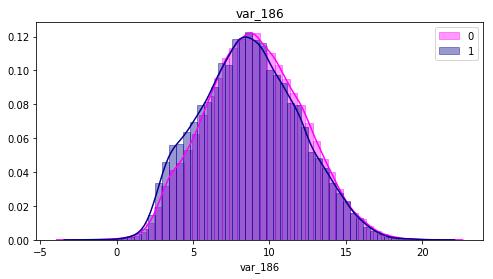

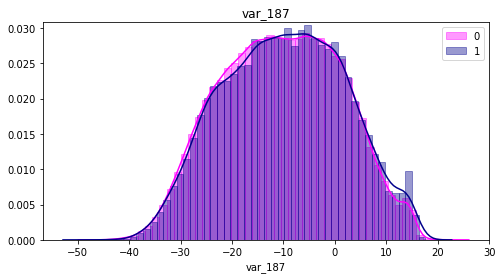

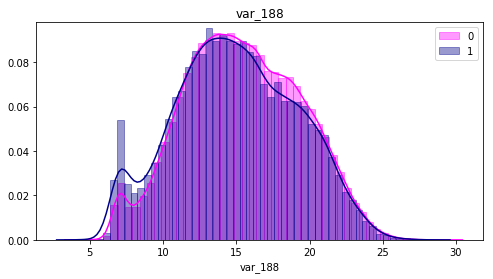

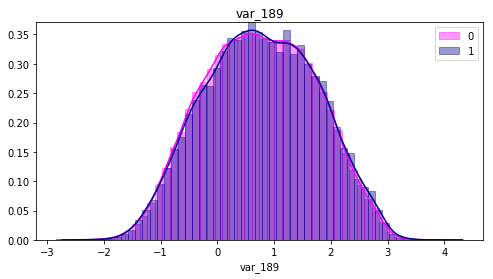

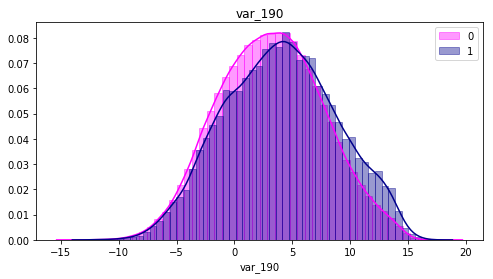

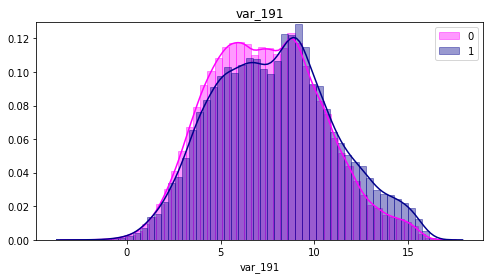

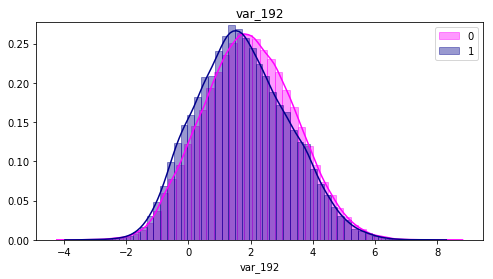

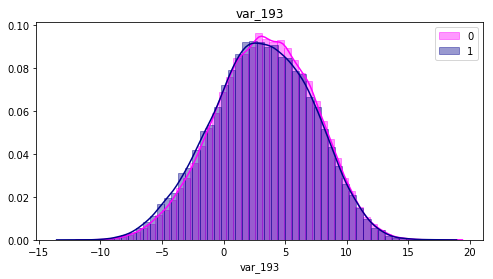

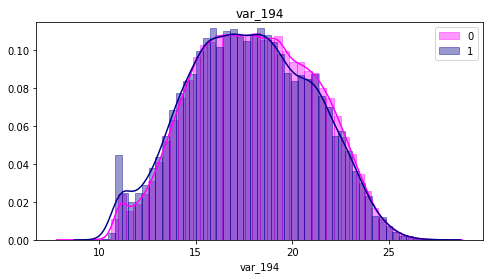

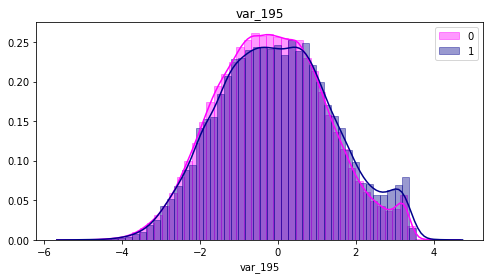

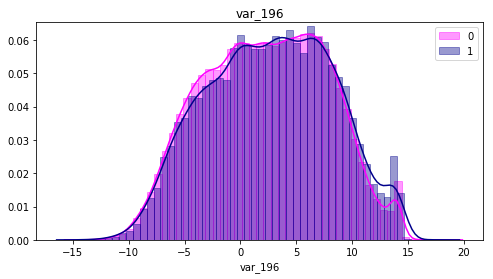

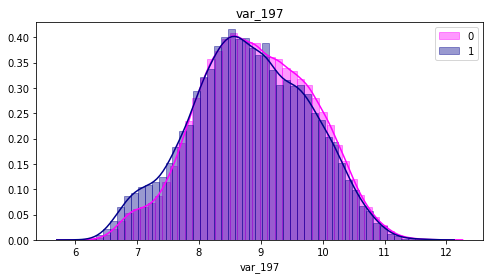

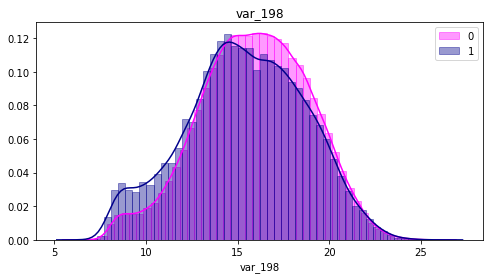

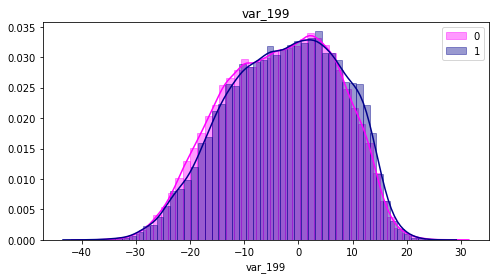

In [28]:
for i in features:
    fig, ax = plt.subplots(1, 1, figsize=(8,4))
    sns.distplot(df.loc[df.target==0, i], ax=ax, label='0',color="magenta", kde=True,hist_kws=dict(edgecolor="magenta", linewidth=1))
    sns.distplot(df.loc[df.target==1, i], ax=ax, label='1',color="darkblue", kde=True, hist_kws=dict(edgecolor="darkblue", linewidth=1))
    ax.set_title('{}'.format(i))
    plt.legend()
    plt.show()

* Not all the features follow normal distribution features like var_4, var_10, var_11, var_17, var_23 and many more follows a normal distribution but features like var_2, var_5, var_8, var_9, var_12 doesn't follow a normal distribution, to see distributions of all features you can go here.
* Some features like var_2, var_6, var_12, var_13, var_26, var_44, var_81, var_139 and many more show some difference in peak for some values in their distribution for different target variables. From this analysis, we can say that tree-based classification algorithms can work well.

In [25]:
data.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  5.7470   ...      4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  8.0851   ...      7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  5.9525   ...      2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  8.2450   ...      4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  7.6784   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [20]:
df_no=df.loc[df.target==0,:].drop(['ID_code','target'],axis=1)


In [21]:
df_no.shape

(179902, 200)

In [22]:
df_yes=df.loc[df.target==1,:].drop(['ID_code','target'],axis=1)

In [23]:
df_yes.shape

(20098, 200)

## Distribution of Mean Values per row and column with Target Variables

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


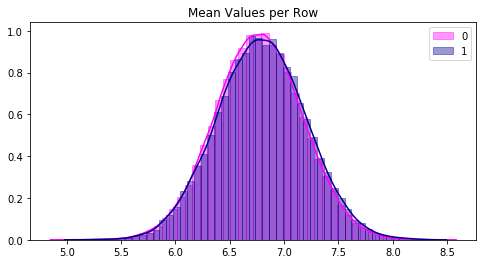

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.mean(axis=1),color="magenta", kde=True,label='0', hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.mean(axis=1),color="darkblue", kde=True,label='1', hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Mean Values per Row')
plt.show()

* As we can see that mean values per row follows a normal distribution for both the target variables.

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


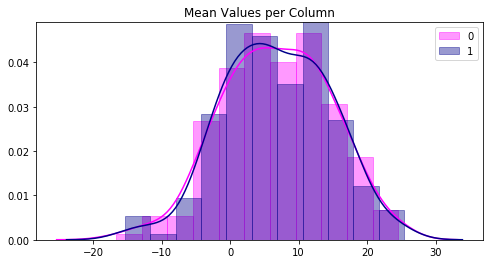

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.mean(axis=0),label='0',color="magenta",kde=True, hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.mean(axis=0),label='1',color="darkblue", kde=True, hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Mean Values per Column')
plt.show()

## Distribution of Median Values per row and column with Target Variables

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


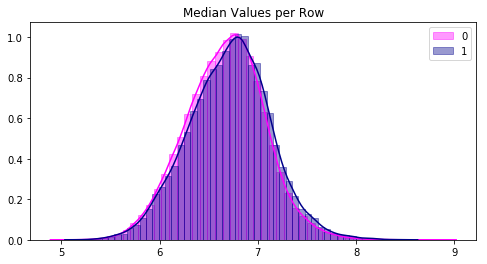

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.median(axis=1),color="magenta", kde=True,label='0', hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.median(axis=1),color="darkblue", kde=True,label='1', hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Median Values per Row')
plt.show()

* Distribution of Median values per row looks almost similar to the distribution of Mean values per row.

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


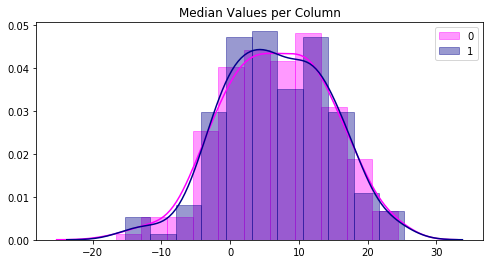

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.median(axis=0),label='0',color="magenta",kde=True, hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.median(axis=0),label='1',color="darkblue", kde=True, hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Median Values per Column')
plt.show()

## Distribution of Standard Deviation Values per row and column with Target Variables

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


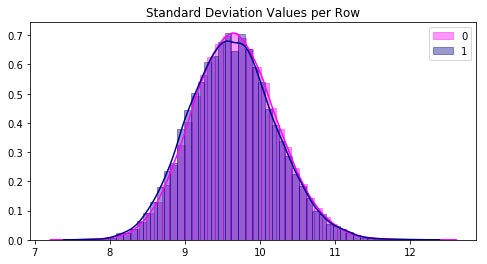

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.std(axis=1),color="magenta", kde=True,label='0', hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.std(axis=1),color="darkblue", kde=True,label='1', hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Standard Deviation Values per Row')
plt.show()

* Distribution of Standard Deviation per row also follows a normal distribution just like the mean and median per row distributions.

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


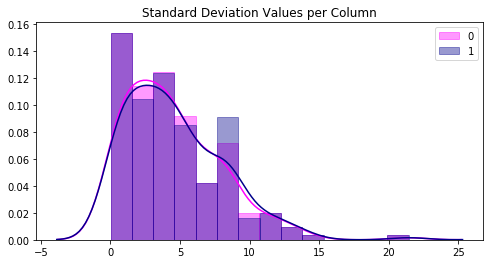

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.std(axis=0),label='0',color="magenta",kde=True, hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.std(axis=0),label='1',color="darkblue", kde=True, hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Standard Deviation Values per Column')
plt.show()

## Distribution of Max Values Values per row and column with Target Variables

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


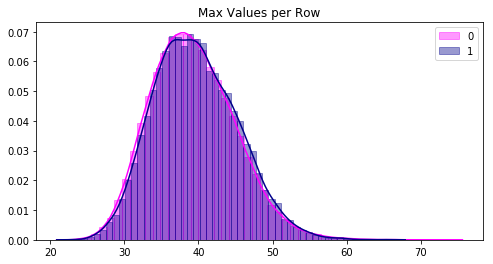

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.max(axis=1),color="magenta", kde=True,label='0', hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.max(axis=1),color="darkblue", kde=True,label='1', hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Max Values per Row')
plt.show()

* As we can see that distribution of Max values per row is slightly skewed to right and most of the values are around 38 and there is a long tail goes past to 75.

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


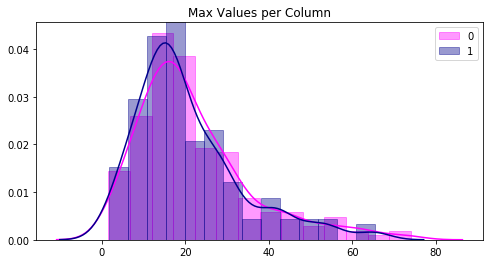

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.max(axis=0),label='0',color="magenta",kde=True, hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.max(axis=0),label='1',color="darkblue", kde=True, hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Max Values per Column')
plt.show()

#### As we can see this distribution is slightly skewed to right and most of the values are around 38 and there is a long tail goes past to 80

## Distribution of Min Values per row and column with Target Variables

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


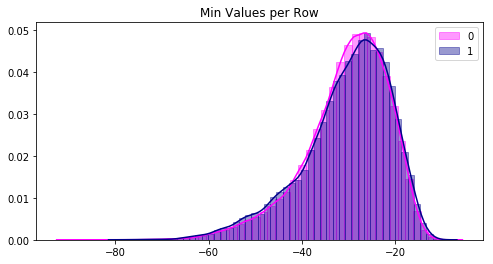

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.min(axis=1),color="magenta", kde=True,label='0', hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.min(axis=1),color="darkblue", kde=True,label='1', hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Min Values per Row')
plt.show()

* Unlike the distribution of Max values per row, Min value per row distribution is skewed to the left with most of the values around -26 and tail goes past to -80.

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


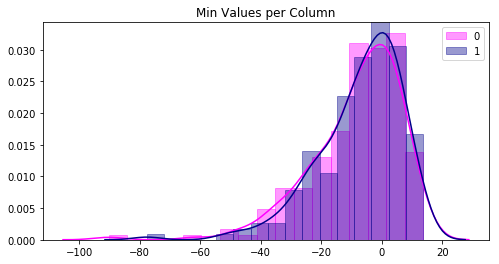

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.min(axis=0),label='0',color="magenta",kde=True, hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.min(axis=0),label='1',color="darkblue", kde=True, hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Min Values per Column')
plt.show()

## Distribution of Skew Values per row and column with Target Variables

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


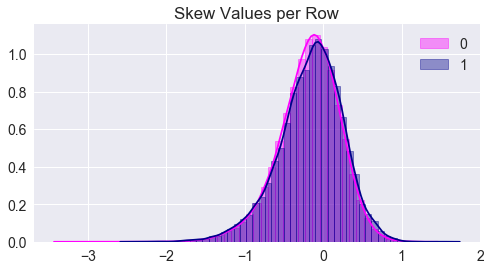

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.skew(axis=1),color="magenta", kde=True,label='0', hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.skew(axis=1),color="darkblue", kde=True,label='1', hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Skew Values per Row')
plt.show()

* As most of the skew values are nearly between -0.5–0.5 but we can also see a long tail on the left side of the distribution of skew values per row which shows there are some data points that are not symmetrical.

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


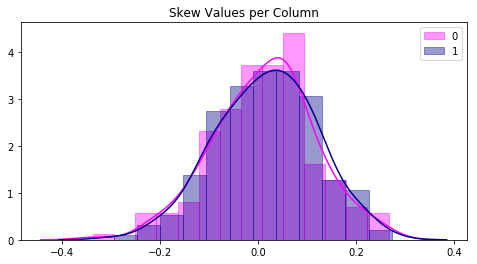

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.skew(axis=0),label='0',color="magenta",kde=True, hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.skew(axis=0),label='1',color="darkblue", kde=True, hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Skew Values per Column')
plt.show()

## Distribution of Kurtosis Values per row and column with Target Variables

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


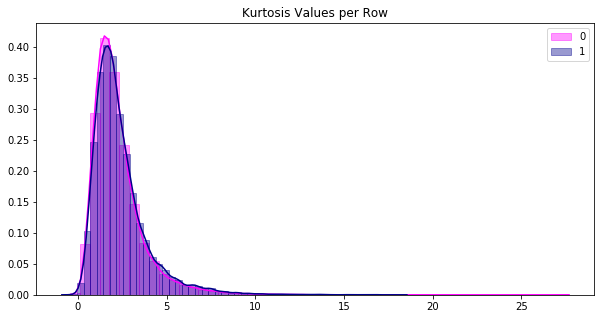

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.distplot(df_no.kurtosis(axis=1),color="magenta", kde=True,label='0', hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.kurtosis(axis=1),color="darkblue", kde=True,label='1', hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Kurtosis Values per Row')
plt.show()

* As we can see that most of the Kurtosis values per row lie near 3 which shows it follows a normal distribution but there is also a long tail to the right that shows there are outliers present in the data but the outliers are very low.

C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


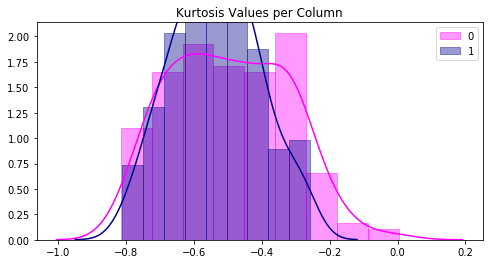

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.distplot(df_no.kurtosis(axis=0),label='0',color="magenta",kde=True, hist_kws=dict(edgecolor="magenta", linewidth=1))
sns.distplot(df_yes.kurtosis(axis=0),label='1',color="darkblue", kde=True, hist_kws=dict(edgecolor="darkblue", linewidth=1))
plt.legend()
ax.set_title('Kurtosis Values per Column')
plt.show()

## Correlations of Features

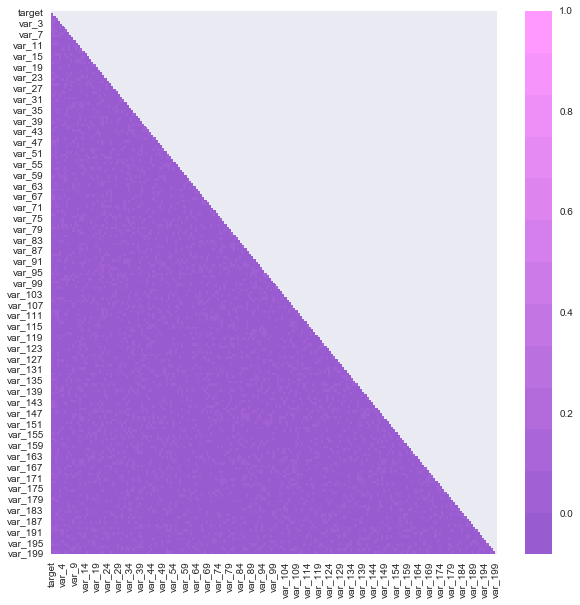

In [109]:
# Ref-https://towardsdatascience.com/annotated-heatmaps-in-5-simple-steps-cc2a0660a27d

corr = df.drop('ID_code',axis=1).corr()
sns.set(rc={'figure.figsize':(10,10)})
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=['#995BD0','#a160d4','#aa65d8','#b36bdc','#bb70e0','#c475e4','#cc7ae7','#d47feb','#dd84ef','#e68af3','#ee8ff7','#f794fb','#FF99FF'])

* As from the above heatmap, we can say that there is very low or no correlation between any features.

In [110]:
corr_df=df.drop('ID_code',axis=1).corr().abs().unstack().sort_values(kind="quicksort").reset_index()

In [111]:
corr_df.shape

(40401, 3)

In [112]:
corr_df = corr_df[corr_df['level_0'] != corr_df['level_1']]

In [113]:
corr_df.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [114]:
corr_df.columns=['level_0', 'level_1', 'corr_value']

In [115]:
corr_df.shape

(40200, 3)

In [120]:
print(" ")
corr_df.head()

level_0  level_1    corr_value
0  var_191   var_75  2.703975e-08
1   var_75  var_191  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07

In [119]:


print(" ")
corr_df.tail()

level_0  level_1  corr_value
40195   target   var_12    0.069489
40196   target  var_139    0.074080
40197  var_139   target    0.074080
40198   target   var_81    0.080917
40199   var_81   target    0.080917

# Models

## Data Splitting

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [122]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.20,stratify=labels)

In [123]:
X_train.shape

(160000, 200)

In [124]:
X_test.shape

(40000, 200)

## Random Forest Model without Hyperparameter tuning

In [160]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import os 
import joblib

In [161]:
r_cfl=RandomForestClassifier(n_estimators=50,n_jobs=-1)
r_cfl.fit(X_train,y_train)
cal_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
cal_clf.fit(X_train, y_train)


C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                                             min_weight_fraction_leaf=0.0,
                                                             n_estimators=50,
                 

C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


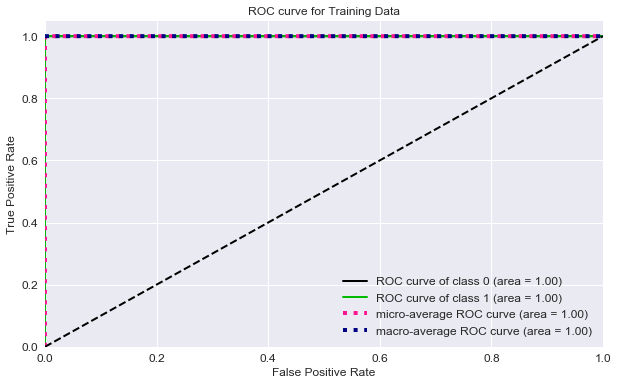

In [162]:
import scikitplot as skplt
sns.set(rc={'figure.figsize':(10,6)})
predict_y = cal_clf.predict_proba(X_train)
skplt.metrics.plot_roc_curve(y_train, predict_y)
plt.title('ROC curve for Training Data')
plt.show()

C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


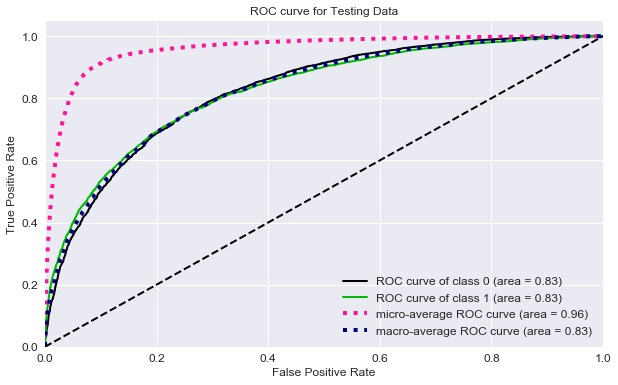

In [163]:
predict_y = cal_clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, predict_y)
plt.title('ROC curve for Testing Data')
plt.show()

In [164]:
predict_y = cal_clf.predict_proba(X_train)
print('Training_ROC Score is :',roc_auc_score(y_train,predict_y[:,1]))
predict_y = cal_clf.predict_proba(X_test)
print('Testing_ROC Score is :',roc_auc_score(y_test,predict_y[:,1]))

Training_ROC Score is : 1.0
Testing_ROC Score is : 0.8261028929836642


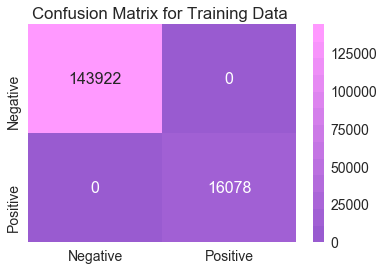

In [165]:
from sklearn.metrics import confusion_matrix
sns.set(rc={'figure.figsize':(6,4)})
pred_train=cal_clf.predict(X_train)
df_cm = pd.DataFrame(confusion_matrix(y_train,pred_train), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap=['#995BD0','#a160d4','#aa65d8','#b36bdc','#bb70e0','#c475e4','#cc7ae7','#d47feb','#dd84ef','#e68af3','#ee8ff7','#f794fb','#FF99FF'])
plt.title('Confusion Matrix for Training Data ')
plt.show()

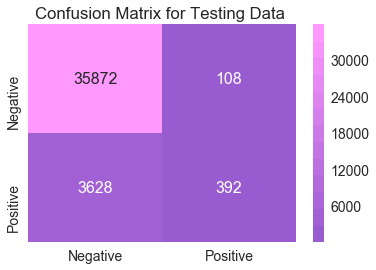

In [166]:
pred_test=cal_clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test,pred_test), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap=['#995BD0','#a160d4','#aa65d8','#b36bdc','#bb70e0','#c475e4','#cc7ae7','#d47feb','#dd84ef','#e68af3','#ee8ff7','#f794fb','#FF99FF'])
plt.title('Confusion Matrix for Testing Data ')
plt.show()

* As from the above results, we can clearly see that this simple random forest model is overfitting there is a huge difference between the training and testing ROC AUC Score and also in the confusion matrix, we can see in the training matrix there is no false positive's and false negative's but in testing matrix we can see large numbers of false positive's.

## XGBoost Model with Hyperparameter tuning

In [147]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import os
import joblib

In [31]:
model = XGBClassifier(
    eval_metric=["auc"]
)

param_grid = {
    "learning_rate": [0.1, 0.01],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [2, 3, 4],
    "n_estimators": [100, 200, 300, 400],
    "reg_lambda": [1, 1.5, 2],
    "gamma": [0, 0.1, 0.3],
}

scoring = {
    'AUC': 'roc_auc', 
}

# create the Kfold object
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds)
# create the grid search object
n_iter=50
grid = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_grid,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
    verbose=1
)

grid.fit(X_train,y_train)
best_clf=grid.best_estimator_
best_clf.fit(X_train,y_train)


In [54]:
best_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.8, eval_metric=['auc'], gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, n_estimators=400, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbose=10)

In [167]:
best_clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.8, eval_metric=['auc'], gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, n_estimators=400, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbose=1)
best_clf.fit(X_train,y_train)

[05:48:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:48:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:48:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:48:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:48:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:48:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:48:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:48:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:48:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:49:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:49:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:49:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:49:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:49:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:49:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:49:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:49:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:49:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:50:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:50:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:50:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:50:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:50:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:50:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:50:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:50:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:50:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:51:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:51:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:51:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:51:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:51:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:51:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:51:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:51:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:51:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:52:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:52:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:52:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:52:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:52:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:52:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:52:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:52:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:52:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:53:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:53:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:53:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[05:53:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:53:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:53:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:53:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:53:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:53:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.8, eval_metric=['auc'], gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbose=1)

In [168]:
from sklearn.calibration import CalibratedClassifierCV
cal_clf = CalibratedClassifierCV(best_clf, method="sigmoid")
cal_clf.fit(X_train, y_train)

C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[05:54:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:54:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[05:54:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:54:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:55:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:55:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:55:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:55:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:55:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:55:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:55:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:55:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:55:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:55:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:56:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:56:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:57:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:57:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:57:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[05:57:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:58:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:58:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:58:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:58:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:58:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:58:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:58:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:58:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:58:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:59:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[05:59:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[05:59:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:00:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:00:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:00:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:00:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:00:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:00:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:00:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:00:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:00:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:01:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:01:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:01:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:02:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:02:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:02:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:02:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:02:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:02:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:02:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:02:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:02:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:03:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:03:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:03:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:04:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:04:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:04:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:04:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:04:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:04:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:04:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:04:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:04:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bytree=0.8,
                                                    eval_metric=['auc'],
                                                    gamma=0.1,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=4,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=400, n_jobs=-1,
                                                    nthread=None,
                                                    objective='binary:logistic',
       

C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


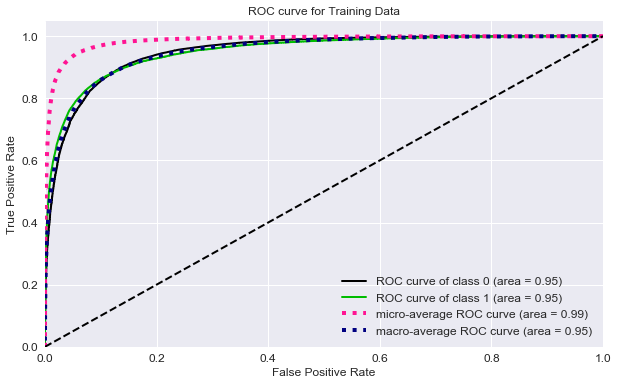

In [169]:
import scikitplot as skplt
sns.set(rc={'figure.figsize':(10,6)})
predict_y = cal_clf.predict_proba(X_train)
skplt.metrics.plot_roc_curve(y_train, predict_y)
plt.title('ROC curve for Training Data')
plt.show()

C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


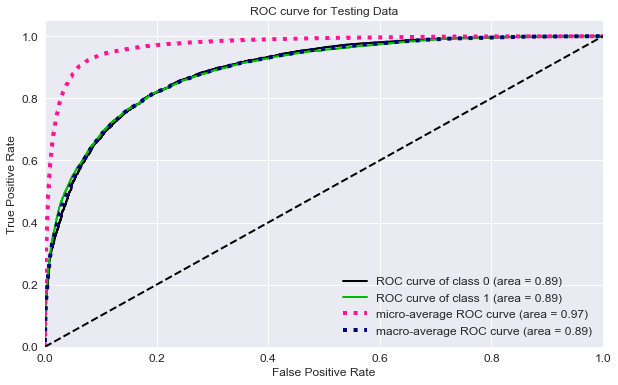

In [170]:
predict_y = cal_clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, predict_y)
plt.title('ROC curve for Testing Data')
plt.show()

In [171]:
predict_y = cal_clf.predict_proba(X_train)
print('Training_ROC Score is :',roc_auc_score(y_train,predict_y[:,1]))
predict_y = cal_clf.predict_proba(X_test)
print('Testing_ROC Score is :',roc_auc_score(y_test,predict_y[:,1]))

Training_ROC Score is : 0.9507958355122003
Testing_ROC Score is : 0.8921887055827035


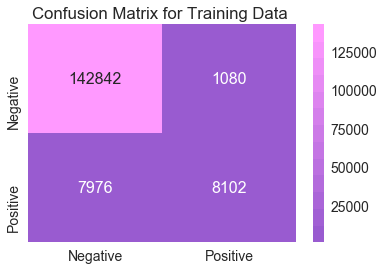

In [172]:
from sklearn.metrics import confusion_matrix
sns.set(rc={'figure.figsize':(6,4)})
pred_train=cal_clf.predict(X_train)
df_cm = pd.DataFrame(confusion_matrix(y_train,pred_train), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap=['#995BD0','#a160d4','#aa65d8','#b36bdc','#bb70e0','#c475e4','#cc7ae7','#d47feb','#dd84ef','#e68af3','#ee8ff7','#f794fb','#FF99FF'])
plt.title('Confusion Matrix for Training Data ')
plt.show()

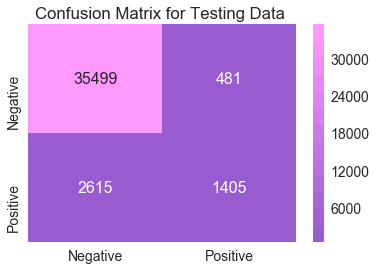

In [173]:
pred_test=cal_clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test,pred_test), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap=['#995BD0','#a160d4','#aa65d8','#b36bdc','#bb70e0','#c475e4','#cc7ae7','#d47feb','#dd84ef','#e68af3','#ee8ff7','#f794fb','#FF99FF'])
plt.title('Confusion Matrix for Testing Data ')
plt.show()

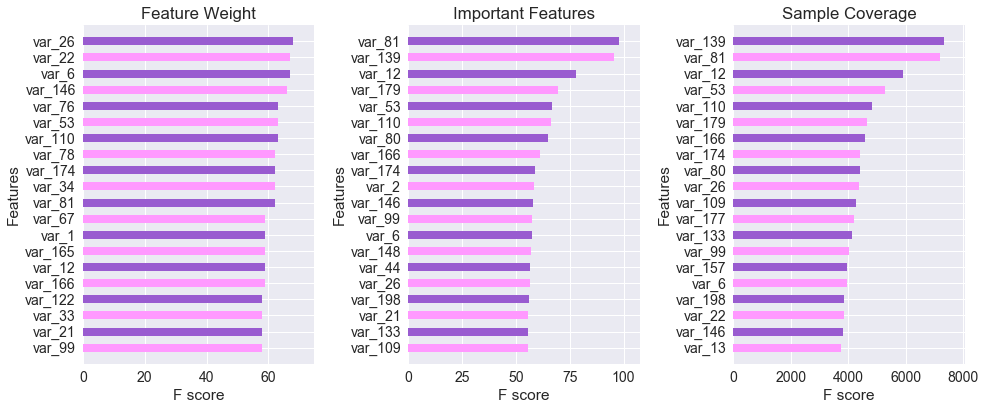

In [185]:
#Ref- https://towardsdatascience.com/running-xgboost-on-google-colab-free-gpu-a-case-study-841c90fef101
import xgboost as xgb
# store the winning model in a new variable
xgc = best_clf
# saving the feature names to the model
xgc.get_booster().feature_names = list(data.columns)
# Create the feature importances plot
fig, ax = plt.subplots(1, 3, figsize=(14,6))
# plot importances with split mean gain
xgb.plot_importance(
    booster=xgc,
    max_num_features=20,
    importance_type='gain',
    title='Important Features',
    show_values=False,
    height=0.5,
    ax=ax[1],
    color=['#FF99FF','#995BD0']
)
# plot importances with feature weight
xgb.plot_importance(
    booster=xgc, 
    max_num_features=20,
    importance_type='weight',
    title='Feature Weight',
    show_values=False,
    height=0.5,
    ax=ax[0],
    color=['#FF99FF','#995BD0']
)

# plot importances with sample coverage
xgb.plot_importance(
    xgc,
    max_num_features=20,
    importance_type='cover',
    title='Sample Coverage',
    show_values=False,
    height=0.5,
    ax=ax[2],
    color=['#FF99FF','#995BD0']
)
plt.tight_layout()
plt.show()

* XGBoost model is doing pretty well as compared to the random forest model this is all because of the hyperparameter tuning and cross-validation, now we can see that the difference between training and testing ROC AUC Score is decreased from that of Random forest model. In the testing confusion matrix, we can see that XGBoost has decreased the false positive's but still, there is a chance of improvement as we haven't done any feature engineering. As we also plotted top 20 important features from XGBoost model as in EDA Section we discussed that features like var_2, var_6, var_81, etc. show some difference in peak for some values in their distribution for different target variables and from the above plots we can see that these features are the important features for getting our good result.

# Feature Engineering

## Statistical New Features

In [8]:
data.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  5.7470   ...      4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  8.0851   ...      7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  5.9525   ...      2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  8.2450   ...      4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  7.6784   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [9]:
data['mean']=data.mean(axis=1)
data['std']=data.std(axis=1)
data['sum']=data.sum(axis=1)
data['min']=data.min(axis=1)
data['max']=data.max(axis=1)
data['skew']=data.skew(axis=1)
data['kurt']=data.kurtosis(axis=1)
data['med']=data.median(axis=1)

In [10]:
data.iloc[:5,200:208]

mean        std          sum      min          max      skew  \
0  7.281591   9.308182  1472.907973 -21.4494  1472.907973  9.983897   
1  7.076818  10.310257  1432.750675 -47.3797  1432.750675  9.956968   
2  6.204483   8.731476  1255.832559 -22.4038  1255.832559  9.969732   
3  6.441159   9.570048  1304.243108 -35.1659  1304.243108  9.957113   
4  6.771155  11.258868  1372.261023 -65.4863  1372.261023  9.921712   

        kurt       med  
0  99.582998  7.281591  
1  99.226898  7.371800  
2  99.393045  6.204483  
3  99.227716  6.975000  
4  98.770229  7.006500

In [11]:
data.shape

(200000, 208)

In [12]:
test=pd.read_csv('test.csv')

In [13]:
test.shape

(200000, 201)

In [14]:
test.head(1)

ID_code    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0  test_0  11.0656  7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493  18.2675   

    var_8   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  2.1337   ...     -2.1556  11.8495    -1.43   2.4508  13.7112   2.4669   

   var_196  var_197  var_198  var_199  
0   4.3654    10.72  15.4722  -8.7197  

[1 rows x 201 columns]

In [15]:
test.drop('ID_code',axis=1,inplace=True)

In [16]:
test.head(1)

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0  11.0656  7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493  18.2675  2.1337   

   var_9   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0   8.81   ...     -2.1556  11.8495    -1.43   2.4508  13.7112   2.4669   

   var_196  var_197  var_198  var_199  
0   4.3654    10.72  15.4722  -8.7197  

[1 rows x 200 columns]

In [17]:
test['mean']=test.mean(axis=1)
test['std']=test.std(axis=1)
test['sum']=test.sum(axis=1)
test['min']=test.min(axis=1)
test['max']=test.max(axis=1)
test['skew']=test.skew(axis=1)
test['kurt']=test.kurtosis(axis=1)
test['med']=test.median(axis=1)

In [18]:
test.shape

(200000, 208)

## Unique Value Counts of Each Feature

In [13]:
df_no=df.loc[df.target==0,:].drop(['ID_code','target'],axis=1)
df_yes=df.loc[df.target==1,:].drop(['ID_code','target'],axis=1)

In [14]:
df_yes.head(1)

var_0   var_1    var_2  var_3   var_4   var_5   var_6    var_7   var_8  \
13  16.3699  1.5934  16.7395  7.333  12.145  5.9004  4.8222  20.9729  1.1064   

     var_9   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
13  8.6978   ...      7.4002   7.4031   4.3989   4.0978  17.3638  -1.3022   

    var_196  var_197  var_198  var_199  
13   9.6846   9.0419  15.6064 -10.8529  

[1 rows x 200 columns]

In [15]:
df_no.head(1)

var_0   var_1    var_2  var_3    var_4   var_5   var_6    var_7  var_8  \
0  8.9255 -6.7863  11.9081  5.093  11.4607 -9.2834  5.1187  18.6266  -4.92   

   var_9   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  5.747   ...      4.4354   3.9642   3.1364    1.691  18.5227  -2.3978   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  

[1 rows x 200 columns]

In [24]:
df_no_unique=df_no.nunique()


In [ ]:
df_yes_unique=df_yes.nunique()

In [ ]:
df_yes_unique.var_170

In [ ]:
df_no_unique.var_170

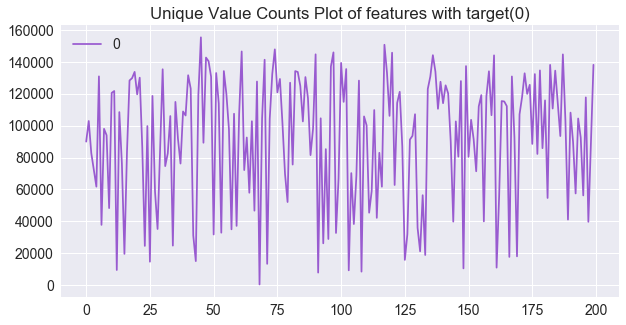

In [278]:
plt.figure(figsize=(10,5))
plt.plot(df_no_unique.values, label = '0',c='#995BD0')
plt.title('Unique Value Counts Plot of features with target(0)')
plt.legend()

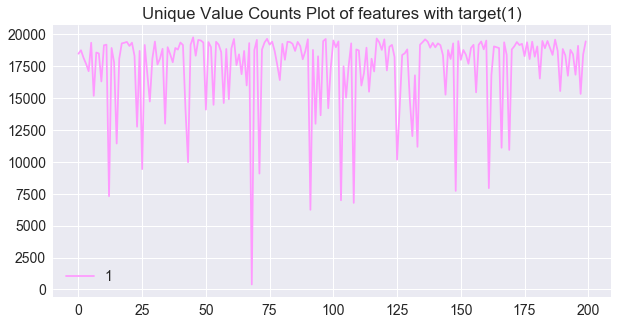

In [279]:
plt.figure(figsize=(10,5))
plt.plot(df_yes_unique.values, label = '1',c='#FF99FF')
plt.title('Unique Value Counts Plot of features with target(1)')
plt.legend()

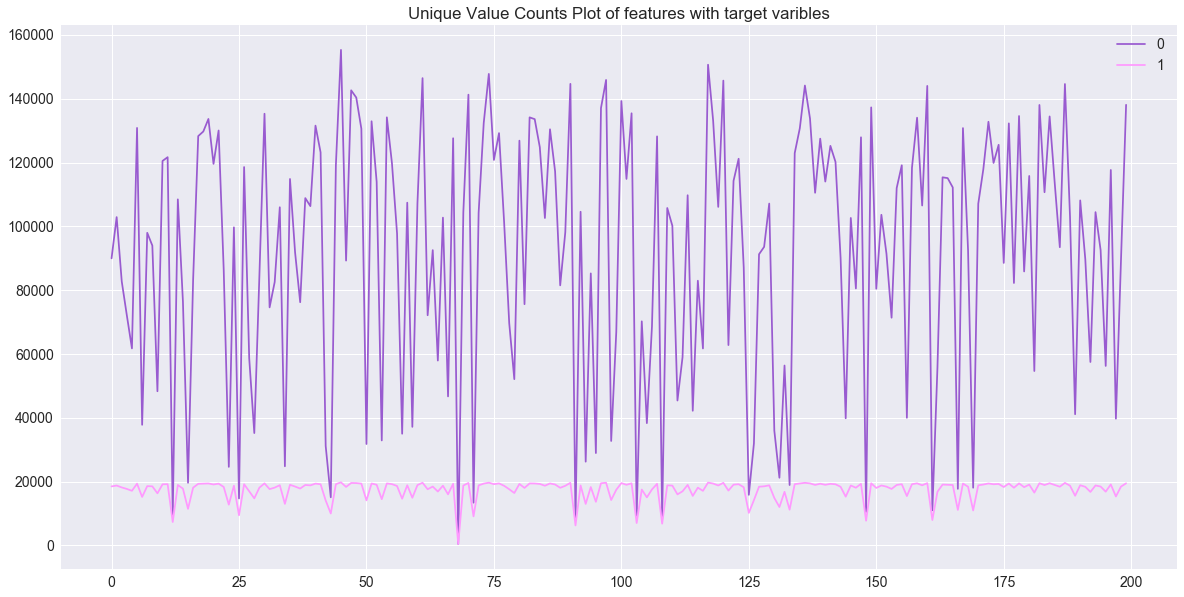

In [270]:
plt.figure(figsize=(20,10))
plt.plot(df_no_unique.values, label = '0',c='#995BD0')
plt.plot(df_yes_unique.values, label = '1',c='#FF99FF')
plt.title('Unique Value Counts Plot of features with target varibles')
plt.legend()

* As the data is imbalanced there will be some difference in there count values. So we created 200 new features representing the count of that particular value in that feature.

In [ ]:
d_uq=data.nunique()
t_uq=test.nunique()

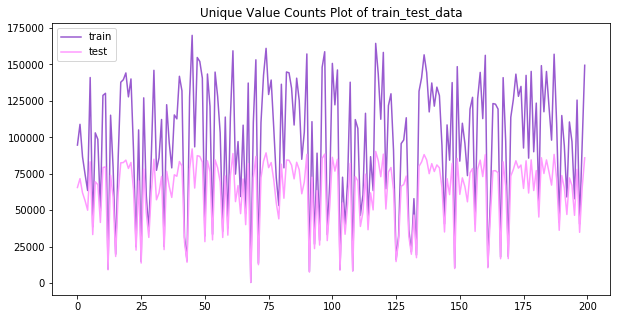

In [25]:
plt.figure(figsize=(10,5))
plt.plot(d_uq.values, label = 'train',c='#995BD0')
plt.plot(t_uq.values, label = 'test',c='#FF99FF')
plt.title('Unique Value Counts Plot of train_test_data')
plt.legend()
plt.show()

#### as we can see there are less unique values in test data as compared to train data and we know from previous analysis that unique values counts is important feature for better result which shows there must be some fake data introduced in test data to make the test score complicated 

In [21]:
test.shape

(200000, 208)

In [22]:
#Ref- https://www.kaggle.com/yag320/list-of-fake-samples-and-public-private-lb-split
from tqdm import tqdm
unique_samples = []
unique_count = np.zeros_like(test)
for feature in tqdm(range(200)):
    _, index_, count_ = np.unique(test.values[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

# Samples which have unique values are real the others are fake
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0] #row with atleast 1 unqiue value will be real data
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print(len(real_samples_indexes))
print(len(synthetic_samples_indexes))

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 31.85it/s]


100000
100000


In [23]:
real_samples_indexes

array([     3,      7,     11, ..., 199995, 199996, 199999], dtype=int64)

In [24]:
synthetic_samples_indexes

array([     0,      1,      2, ..., 199994, 199997, 199998], dtype=int64)

In [25]:
real_test=test.iloc[real_samples_indexes,:]

In [26]:
real_test.shape

(100000, 208)

In [27]:
col=data.columns

In [28]:
from tqdm import tqdm

In [29]:
for i in tqdm(range(200)):
    temp='freq_'+str(i)
    data[temp]=data.iloc[:,i].map(data.iloc[:,i].value_counts())

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:09<00:00, 20.90it/s]


In [30]:
data.shape

(200000, 408)

In [31]:
data.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9    ...     freq_190  freq_191  freq_192  freq_193  freq_194  \
0  5.7470    ...            3         6         7         3         4   
1  8.0851    ...            5         4         6         1         1   
2  5.9525    ...            3         4         3         1         2   
3  8.2450    ...            1         2         4         4         3   
4  7.6784    ...            3         4         1         1         1   

   freq_195  freq_196  freq_197  freq_198  freq_199  
0         4         3        13         5         2  
1         2         2        13         2         1  
2         2         3         8         2         2  
3         7         4         4         2         2  
4         5         3         6         2         2  

[5 rows x 408 columns]

#### So after Feature Engineering, we have a total of 408 features that are 200 Original features + 8 Statistical features + 200 Unique value counts features.

In [32]:
for i in tqdm(range(200)):
    temp='freq_'+str(i)
    test[temp]=test.iloc[:,i].map(real_test.iloc[:,i].value_counts()) #creating features using only real data

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 35.82it/s]


In [34]:
test.shape

(200000, 408)

# Models after Feature Engineering

## Data Splitting

In [199]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.20,stratify=labels)

## XGBoost Model with Hyperparameter tuning and Class Weight Balance

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [ ]:
class_weights

In [ ]:
w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]

In [80]:
model = XGBClassifier(
    eval_metric=["auc"]
)

param_grid = {
    "learning_rate": [0.1, 0.01],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [2, 3, 4],
    "n_estimators": [100, 200, 300, 400],
    "reg_lambda": [1, 1.5, 2],
    "gamma": [0, 0.1, 0.3],
}

scoring = {
    'AUC': 'roc_auc', 
}

# create the Kfold object
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds)
# create the grid search object
n_iter=50
grid = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_grid,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
    verbose=1
)

best_model = grid.fit(X_train,y_train)
best_clf=grid.best_estimator_
best_clf.fit(X_train,y_train)


C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.3 when using version 0.21.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [81]:
best_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.8, eval_metric=['auc'], gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, tree_method='gpu_hist')

In [203]:
best_clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.8, eval_metric=['auc'], gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1,n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8)
best_clf.fit(X_train,y_train,sample_weight=w_array)

[06:23:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[06:24:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[06:24:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[06:24:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:24:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[06:24:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[06:24:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[06:24:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[06:24:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:30:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:30:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:30:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:30:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:30:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:30:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:30:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:30:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:30:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:37:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:37:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:37:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:37:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:37:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:37:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:37:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:37:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:37:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.8, eval_metric=['auc'], gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8)

In [204]:
from sklearn.calibration import CalibratedClassifierCV
cal_clf = CalibratedClassifierCV(best_clf, method="sigmoid")
cal_clf.fit(X_train, y_train)



C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[06:41:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:41:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:41:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:41:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:41:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:41:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:41:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:41:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:42:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:45:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:45:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:45:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:45:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:45:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:45:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:46:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:46:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:46:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:49:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:49:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:49:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:49:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:50:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:50:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:50:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:50:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:50:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:54:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:54:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:54:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:54:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:54:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:54:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:54:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:54:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:54:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[06:58:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:58:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:58:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:58:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:58:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:58:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:58:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:58:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[06:58:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[07:02:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:02:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:02:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:02:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:02:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:02:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:02:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:02:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:02:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[07:06:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:06:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:06:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:06:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:06:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:06:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:06:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:06:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:06:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[07:10:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:10:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:10:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:10:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:10:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:10:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:10:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:10:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:10:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[07:14:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:14:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:14:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:14:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:14:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:14:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:14:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:14:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[07:14:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bytree=0.8,
                                                    eval_metric=['auc'],
                                                    gamma=0.1,
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=4,
                                                    min_child_weight=1,
                                                    missing=None,
                                                    n_estimators=400, n_jobs=1,
                                                    nthread=None,
                                                    objective='binary:logistic',
        

C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


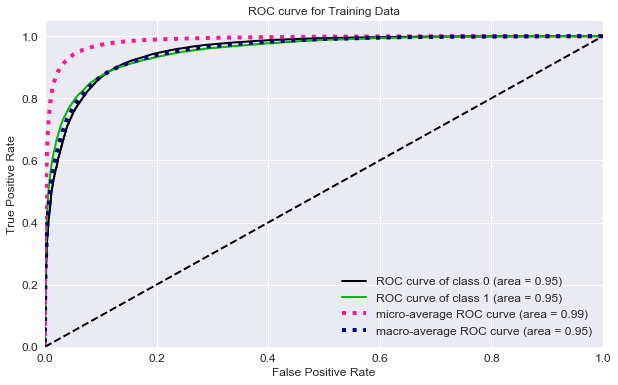

In [205]:
import scikitplot as skplt
sns.set(rc={'figure.figsize':(10,6)})
predict_y = cal_clf.predict_proba(X_train)
skplt.metrics.plot_roc_curve(y_train, predict_y)
plt.title('ROC curve for Training Data')
plt.show()

C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


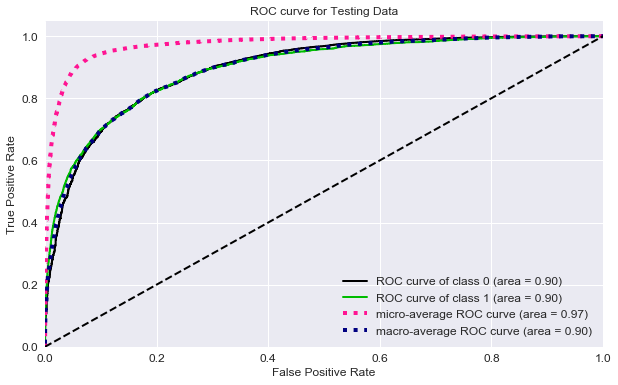

In [206]:
predict_y = cal_clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, predict_y)
plt.title('ROC curve for Testing Data')
plt.show()

In [207]:
predict_y = cal_clf.predict_proba(X_train)
print('Training_ROC Score is :',roc_auc_score(y_train,predict_y[:,1]))
predict_y = cal_clf.predict_proba(X_test)
print('Testing_ROC Score is :',roc_auc_score(y_test,predict_y[:,1]))

Training_ROC Score is : 0.9536247598743288
Testing_ROC Score is : 0.8965695563317377


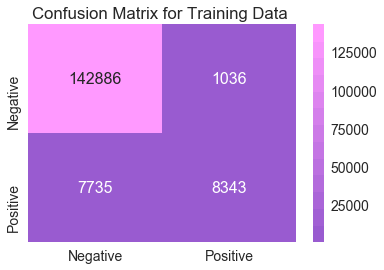

In [208]:
from sklearn.metrics import confusion_matrix
sns.set(rc={'figure.figsize':(6,4)})
pred_train=cal_clf.predict(X_train)
df_cm = pd.DataFrame(confusion_matrix(y_train,pred_train), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap=['#995BD0','#a160d4','#aa65d8','#b36bdc','#bb70e0','#c475e4','#cc7ae7','#d47feb','#dd84ef','#e68af3','#ee8ff7','#f794fb','#FF99FF'])
plt.title('Confusion Matrix for Training Data ')
plt.show()

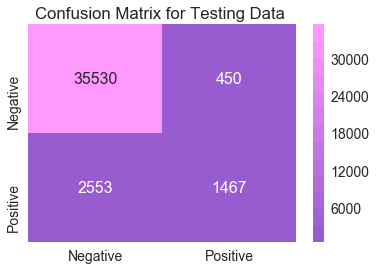

In [209]:
pred_test=cal_clf.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test,pred_test), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap=['#995BD0','#a160d4','#aa65d8','#b36bdc','#bb70e0','#c475e4','#cc7ae7','#d47feb','#dd84ef','#e68af3','#ee8ff7','#f794fb','#FF99FF'])
plt.title('Confusion Matrix for Testing Data ')
plt.show()

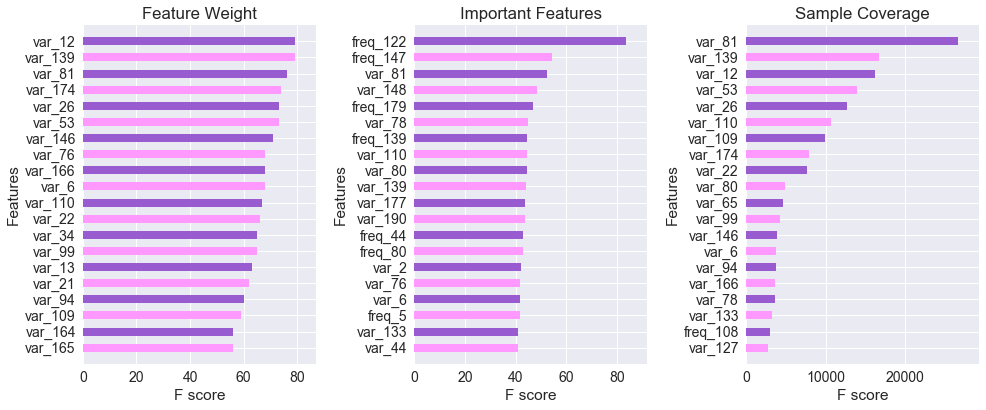

In [210]:
#Ref- https://towardsdatascience.com/running-xgboost-on-google-colab-free-gpu-a-case-study-841c90fef101
import xgboost as xgb
# store the winning model in a new variable
xgc = best_clf
# saving the feature names to the model
xgc.get_booster().feature_names = list(data.columns)
# Create the feature importances plot
fig, ax = plt.subplots(1, 3, figsize=(14,6))
# plot importances with split mean gain
xgb.plot_importance(
    booster=xgc,
    max_num_features=20,
    importance_type='gain',
    title='Important Features',
    show_values=False,
    height=0.5,
    ax=ax[1],
    color=['#FF99FF','#995BD0']
)
# plot importances with feature weight
xgb.plot_importance(
    booster=xgc, 
    max_num_features=20,
    importance_type='weight',
    title='Feature Weight',
    show_values=False,
    height=0.5,
    ax=ax[0],
    color=['#FF99FF','#995BD0']
)

# plot importances with sample coverage
xgb.plot_importance(
    xgc,
    max_num_features=20,
    importance_type='cover',
    title='Sample Coverage',
    show_values=False,
    height=0.5,
    ax=ax[2],
    color=['#FF99FF','#995BD0']
)
plt.tight_layout()
plt.show()

* As we can see there is a slight increase in Testing ROC AUC Score and also there is not much difference between training and testing ROC AUC Score. From the important feature plot, we can see that our new features of Unique value counts are contributing pretty well in the model.

## Splitting Data 

In [29]:
from sklearn.model_selection import train_test_split
X_train_cv,X_test,y_train_cv,y_test=train_test_split(data,labels,test_size=0.20,stratify=labels)

In [30]:
X_train_cv.shape

(160000, 408)

In [31]:
X_test.shape

(40000, 408)

## LightGBM Model with Bayesian Optimization and Data Augmentation 

In [32]:
#Ref- https://www.kaggle.com/jiweiliu/lgb-2-leaves-augment

In [37]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold,KFold

In [38]:
def augment(x,y,t=2):
    xs,xn = [],[]
    for i in range(t):
        mask = y>0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    for i in range(t//2):
        mask = y==0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xn.append(x1)

    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y

In [ ]:
'''
#Ref- https://www.kaggle.com/a31314431/bayesian-optimization-lightgbm

import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import log_loss
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import itertools
from skopt import gp_minimize
import gc

space  = { 'num_leaves': (5, 20), 
    'min_data_in_leaf': (5, 20),  
    'learning_rate': (0, 0.3),
    'min_sum_hessian_in_leaf': (0.00001, 0.01),    
    'feature_fraction': (0.05, 0.5),
    'lambda_l2': (0, 5.0), 
    'min_gain_to_split': (0, 1.0),
    'max_depth':(3,15),
    'bagging_fraction':(0,1),
    'lambda_l1': (0,5),
    'lambda_l2': (0,5),
    }
    
    
def objective(values):
    

   param = {'bagging_fraction': param['bagging_fraction'],
   'bagging_freq': 3,
   'lambda_l2': param['lambda_l2'],
   'learning_rate': 0.00141,
   'max_depth': 3,
   'min_data_in_leaf': 17,
   'min_gain_to_split': 0.2525,
   'min_sum_hessian_in_leaf': 19.55,
   'num_leaves': 20,
   'feature_fraction': 1,
   'save_binary': True,
   'seed': 2319,
   'feature_fraction_seed': 2319,
   'bagging_seed': 2319,
   'drop_seed': 2319,
   'data_random_seed': 2319,
   'objective': 'binary',
   'boosting_type': 'gbdt',
   'verbosity': -1,
   'metric': 'auc',
   'is_unbalance': True,
   'boost_from_average': 'false',
   'num_threads': 6}

    print('\nNext set of params.....',params)
    
    early_stopping_rounds = 4000
    num_boost_round       = 1000
    
        # Fit model on feature_set and calculate validation AUROC
    xgtrain = lgb.Dataset(X_train_merge, label=y_train)
    xgvalid = lgb.Dataset(X_cv_merge, label=y_cv)
    
    evals_results = {}
    model_lgb     = lgb.train(params,xgtrain,valid_sets=[xgtrain, xgvalid], 
                              valid_names=['train','valid'], 
                               evals_result=evals_results, 
                               num_boost_round=num_boost_round,
                                early_stopping_rounds=early_stopping_rounds,
                               verbose_eval=None, feval=None)
    
    loss = log_loss(y_cv, model_lgb.predict(X_cv_merge))
    
    print('\LogLoss.....',loss,".....iter.....", model_lgb.current_iteration())
    
    gc.collect()
    
    return  loss
    
res_gp = gp_minimize(objective, space, n_calls=20,
                     random_state=0,n_random_starts=10)

'''

In [35]:
# best parameter after bayesian opitmization
random_state = 42
np.random.seed(random_state)

param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 1.0,
    'learning_rate': 0.0083,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary',
    'verbosity': -1
}

In [36]:
num_folds = 11
features = [i for i in data.columns ]

folds = KFold(n_splits=num_folds, random_state=random_state)
oof = np.zeros(len(X_train_cv))
getVal = np.zeros(len(X_train_cv))
predictions = np.zeros(len(y_train_cv))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train_cv.values, y_train_cv.values)):
    
    X_train, y_train = X_train_cv.iloc[trn_idx][features], y_train_cv.iloc[trn_idx]
    X_valid, y_valid = X_train_cv.iloc[val_idx][features], y_train_cv.iloc[val_idx]
    
    X_tr, y_tr = augment(X_train.values, y_train.values)
    X_tr = pd.DataFrame(X_tr)
    
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_tr, label=y_tr)
    val_data = lgb.Dataset(X_valid, label=y_valid)
    
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 4000)
    oof[val_idx] = clf.predict(X_train_cv.iloc[val_idx][features], num_iteration=clf.best_iteration)
    getVal[val_idx]+= clf.predict(X_train_cv.iloc[val_idx][features], num_iteration=clf.best_iteration) / folds.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    #predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits
    
print("\n >> CV score: {:<8.5f}".format(roc_auc_score(y_train_cv, oof)))

Fold idx:1
Training until validation scores don't improve for 4000 rounds
[5000]	training's auc: 0.926608	valid_1's auc: 0.899438
[10000]	training's auc: 0.942663	valid_1's auc: 0.899895
Early stopping, best iteration is:
[8440]	training's auc: 0.938287	valid_1's auc: 0.901028
Fold idx:2
Training until validation scores don't improve for 4000 rounds
[5000]	training's auc: 0.926816	valid_1's auc: 0.895013
[10000]	training's auc: 0.942697	valid_1's auc: 0.898598
Early stopping, best iteration is:
[10425]	training's auc: 0.943879	valid_1's auc: 0.898742
Fold idx:3
Training until validation scores don't improve for 4000 rounds
[5000]	training's auc: 0.926966	valid_1's auc: 0.895605
[10000]	training's auc: 0.94294	valid_1's auc: 0.898409
Early stopping, best iteration is:
[10096]	training's auc: 0.9432	valid_1's auc: 0.898484
Fold idx:4
Training until validation scores don't improve for 4000 rounds
[5000]	training's auc: 0.926356	valid_1's auc: 0.897696
[10000]	training's auc: 0.94237	valid

C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


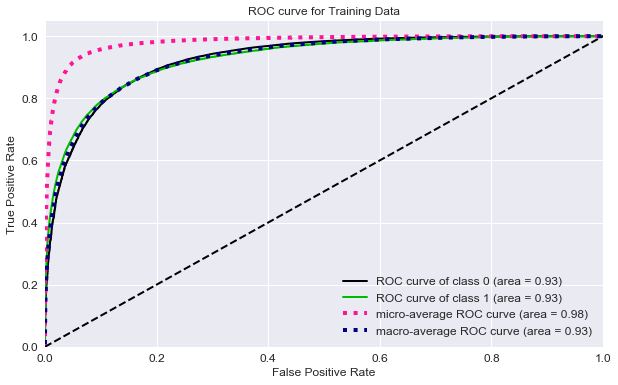

In [37]:
import scikitplot as skplt
sns.set(rc={'figure.figsize':(10,6)})
predict_y = clf.predict(X_train_cv)
predict_y_prob=[[abs(1-i),i] for i in predict_y]
skplt.metrics.plot_roc_curve(y_train_cv, predict_y_prob)
plt.title('ROC curve for Training Data')
plt.show()

C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


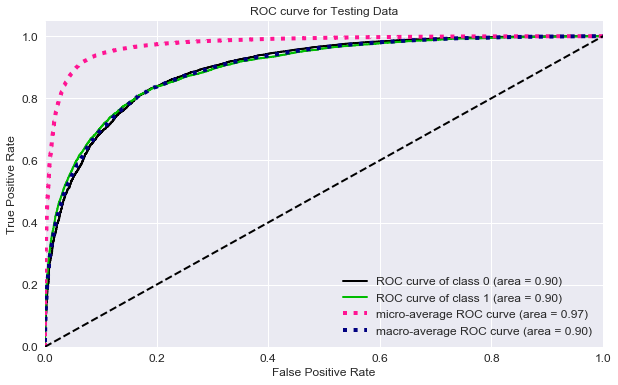

In [38]:
predict_y = clf.predict(X_test)
predict_y_prob=[[abs(1-i),i] for i in predict_y]
skplt.metrics.plot_roc_curve(y_test, predict_y_prob)
plt.title('ROC curve for Testing Data')
plt.show()

In [39]:
predict_y = clf.predict(X_train_cv)
print('Training_ROC Score is :',roc_auc_score(y_train_cv,predict_y))
predict_y = clf.predict(X_test)
print('Testing_ROC Score is :',roc_auc_score(y_test,predict_y))

Training_ROC Score is : 0.9272088070351315
Testing_ROC Score is : 0.8988981164217821


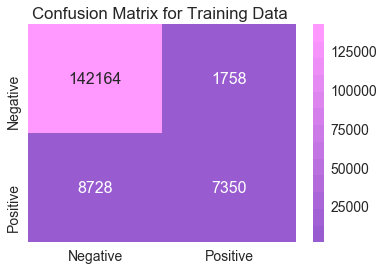

In [40]:
from sklearn.metrics import confusion_matrix
sns.set(rc={'figure.figsize':(6,4)})
pred_train=clf.predict(X_train_cv)
pred_train_v=[1 if i>0.5 else 0 for i in pred_train]
df_cm = pd.DataFrame(confusion_matrix(y_train_cv,pred_train_v), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap=['#995BD0','#a160d4','#aa65d8','#b36bdc','#bb70e0','#c475e4','#cc7ae7','#d47feb','#dd84ef','#e68af3','#ee8ff7','#f794fb','#FF99FF'])
plt.title('Confusion Matrix for Training Data ')
plt.show()

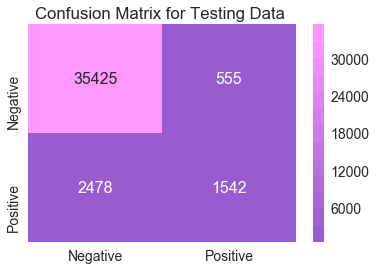

In [41]:
pred_test=clf.predict(X_test)
pred_test_v=[1 if i>0.5 else 0 for i in pred_test]
df_cm = pd.DataFrame(confusion_matrix(y_test,pred_test_v), ["Negative", "Positive"],["Negative", "Positive"],dtype=int)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap=['#995BD0','#a160d4','#aa65d8','#b36bdc','#bb70e0','#c475e4','#cc7ae7','#d47feb','#dd84ef','#e68af3','#ee8ff7','#f794fb','#FF99FF'])
plt.title('Confusion Matrix for Testing Data ')
plt.show()

C:\Users\SKS\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
C:\Users\SKS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


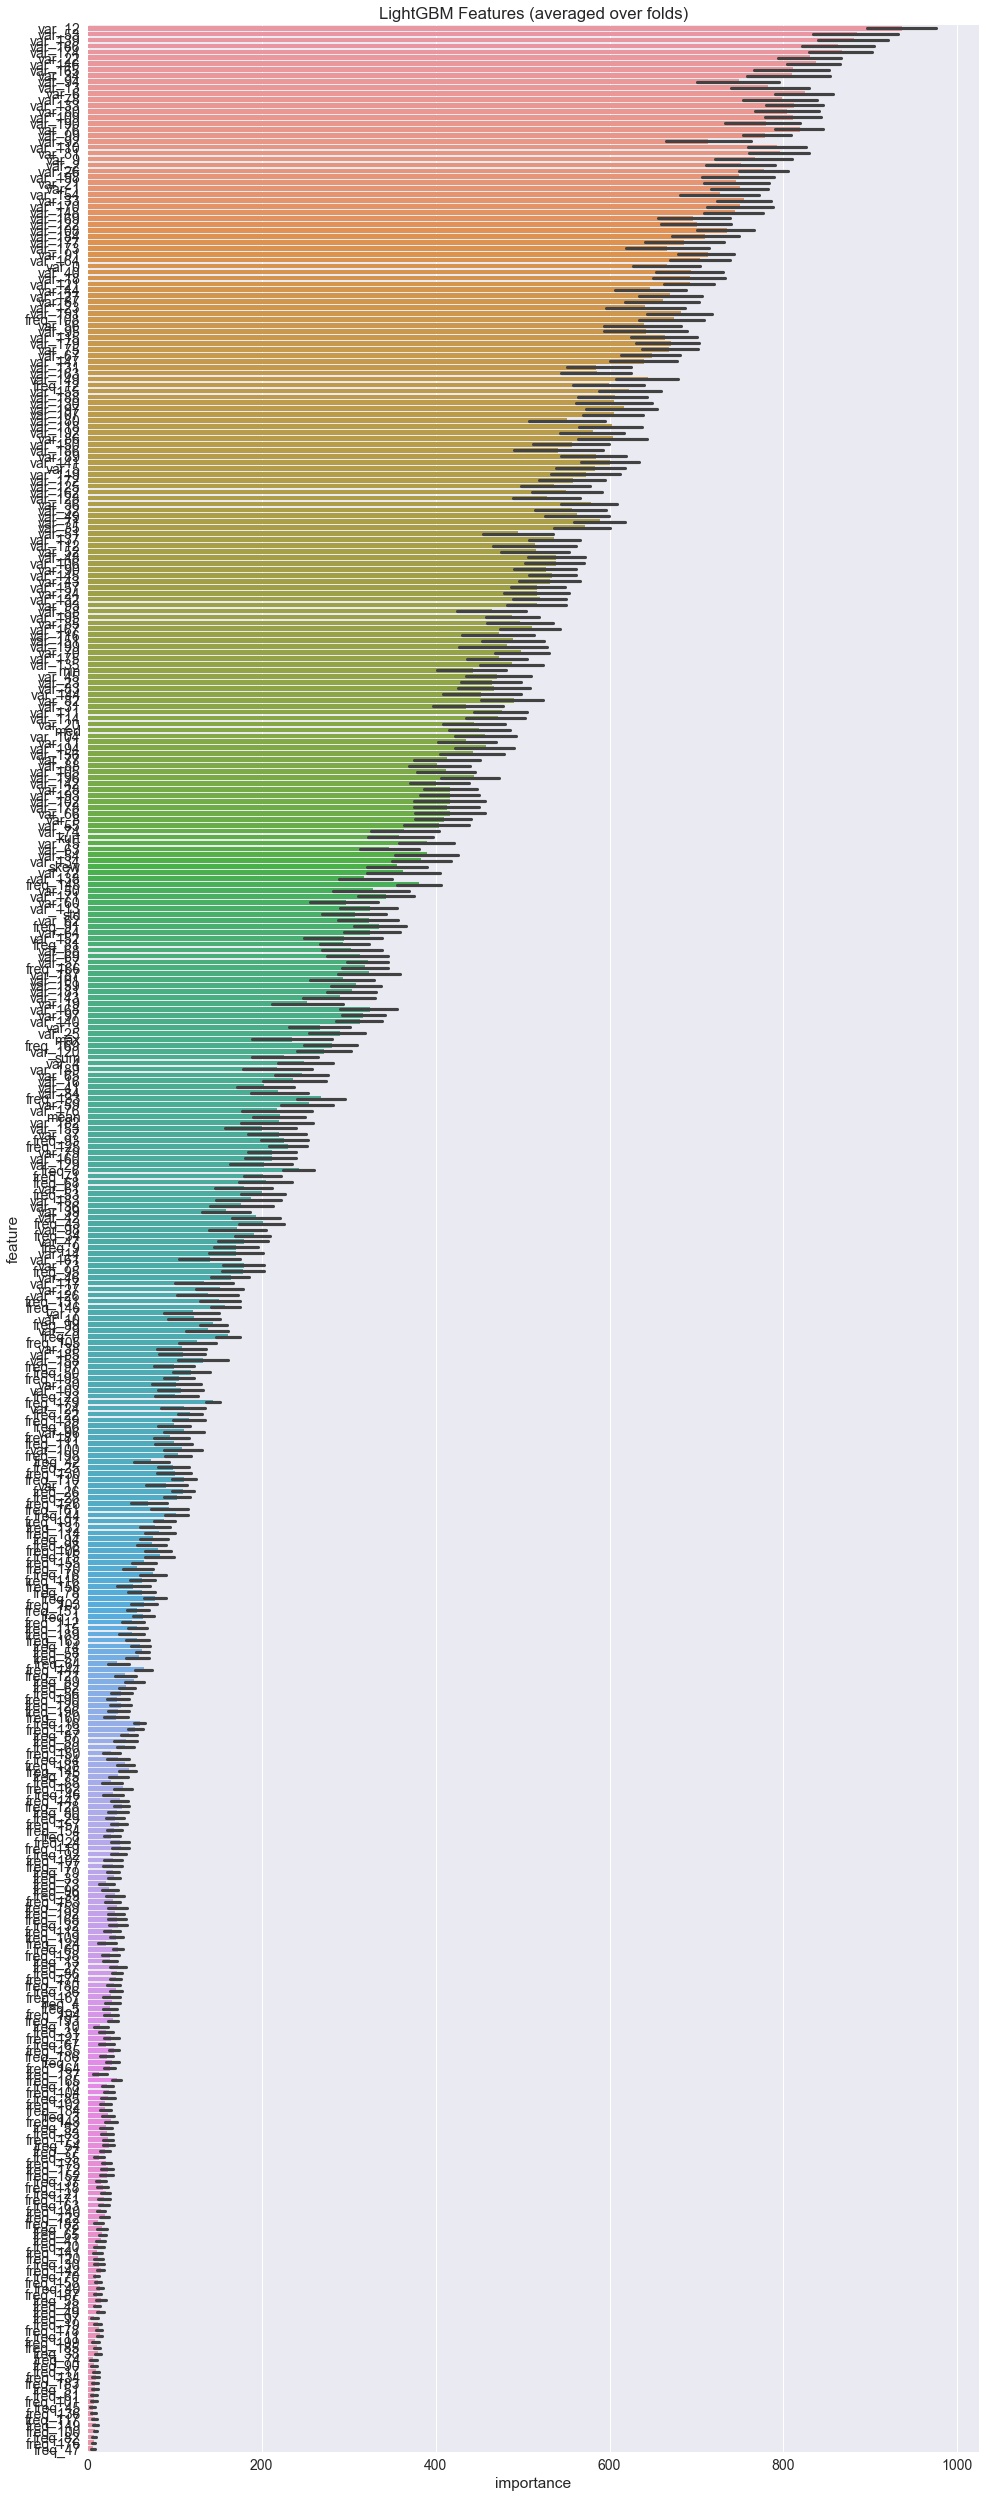

In [42]:
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,35))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

* By using LightGBM training and test ROC Scores are very close to each other which shows this model is not overfitting that much and also no. of True Positives (TP) are highest in LightGBM model which is very good.

# Final Models for Kaggle Submission with Complete training data

## LightGBM with complete Training data 

In [35]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [41]:
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

random_state = 42
np.random.seed(random_state)

param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 1.0,
    'learning_rate': 0.0083,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary',
    'verbosity': -1
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
oof = train_df[['ID_code', 'target']]
oof['predict'] = 0
predictions = test_df[['ID_code']]
val_aucs = []
feature_importance_df = pd.DataFrame()

features = [col for col in data.columns]
X_test = test.values

for fold, (trn_idx, val_idx) in enumerate(skf.split(data, labels)):
    X_train, y_train = data.iloc[trn_idx][features], labels.iloc[trn_idx]
    X_valid, y_valid = data.iloc[val_idx][features], labels.iloc[val_idx]
    
    N = 3
    p_valid,yp = 0,0
    for i in range(N):
        X_t, y_t = augment(X_train.values, y_train.values)
        X_t = pd.DataFrame(X_t)
        X_t = X_t.add_prefix('var_')
    
        trn_data = lgb.Dataset(X_t, label=y_t)
        val_data = lgb.Dataset(X_valid, label=y_valid)
        evals_result = {}
        lgb_clf = lgb.train(params,trn_data,100000,valid_sets = [trn_data, val_data],early_stopping_rounds=1500,verbose_eval = 5000,evals_result=evals_result)
        p_valid += lgb_clf.predict(X_valid)
        yp += lgb_clf.predict(X_test)
    
    oof['predict'][val_idx] = p_valid/N
    val_score = roc_auc_score(y_valid, p_valid)
    val_aucs.append(val_score)
    predictions['fold{}'.format(fold+1)] = yp/N
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = lgb_clf.feature_importance()
    fold_importance_df["fold"] = fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
mean_auc = np.mean(val_aucs)
std_auc = np.std(val_aucs)
all_auc = roc_auc_score(oof['target'], oof['predict'])
print("Mean auc: %.9f, std: %.9f. All auc: %.9f." % (mean_auc, std_auc, all_auc))

predictions['target'] = np.mean(predictions[[col for col in predictions.columns if col not in ['ID_code', 'target']]].values, axis=1)
submission = pd.DataFrame({"ID_code":test_df["ID_code"].values})
submission["target"] = predictions['target']
submission.to_csv("lgb_submission.csv", index=False)

Training until validation scores don't improve for 1500 rounds
[5000]	training's auc: 0.928915	valid_1's auc: 0.898533
Early stopping, best iteration is:
[7316]	training's auc: 0.93729	valid_1's auc: 0.900214
Training until validation scores don't improve for 1500 rounds
[5000]	training's auc: 0.92932	valid_1's auc: 0.897769
Early stopping, best iteration is:
[8309]	training's auc: 0.940802	valid_1's auc: 0.89946
Training until validation scores don't improve for 1500 rounds
[5000]	training's auc: 0.928853	valid_1's auc: 0.897584
[10000]	training's auc: 0.945735	valid_1's auc: 0.899033
Early stopping, best iteration is:
[9105]	training's auc: 0.942992	valid_1's auc: 0.899203
Training until validation scores don't improve for 1500 rounds
[5000]	training's auc: 0.929764	valid_1's auc: 0.896214
Early stopping, best iteration is:
[7735]	training's auc: 0.939449	valid_1's auc: 0.897566
Training until validation scores don't improve for 1500 rounds
[5000]	training's auc: 0.929961	valid_1's a

In [51]:
joblib.dump(lgb_clf, 'light_gbm_comp.pkl')

['light_gbm_comp.pkl']

## LightGBM with Independent var_i and freq_i features (no statistical features) 

#### As from Correlation EDA we have seen that the correlation between features is very low so all the features are nearly independent so we can build models using these independent featrues like var_0 and freq_0, var_1 and freq_1,......, var199 and freq_199 as these 2 pairs are related 

In [50]:
import lightgbm as lgb
from scipy.special import logit
from sklearn.externals import joblib
pred = 0
for var in tqdm(range(200)):
    
    model = lgb.LGBMClassifier(**{
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 1.0,
    'learning_rate': 0.0083,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary',
    'verbosity': -1
})   
    
   
    model = model.fit(np.hstack([data['var_'+str(var)].values.reshape(-1,1),data['freq_'+str(var)].values.reshape(-1,1)]),labels.values)
    joblib.dump(model, 'ind_model_{}.pkl'.format(var))
    pred += logit(model.predict_proba(np.hstack([test['var_'+str(var)].values.reshape(-1,1),test['freq_'+str(var)].values.reshape(-1,1)]))[:,1])
    
pd.DataFrame({"ID_code":test_df["ID_code"], "target":pred}).to_csv("independent_models_new.csv", index=False)


C:\Users\SKS\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [02:07<00:00,  1.62it/s]


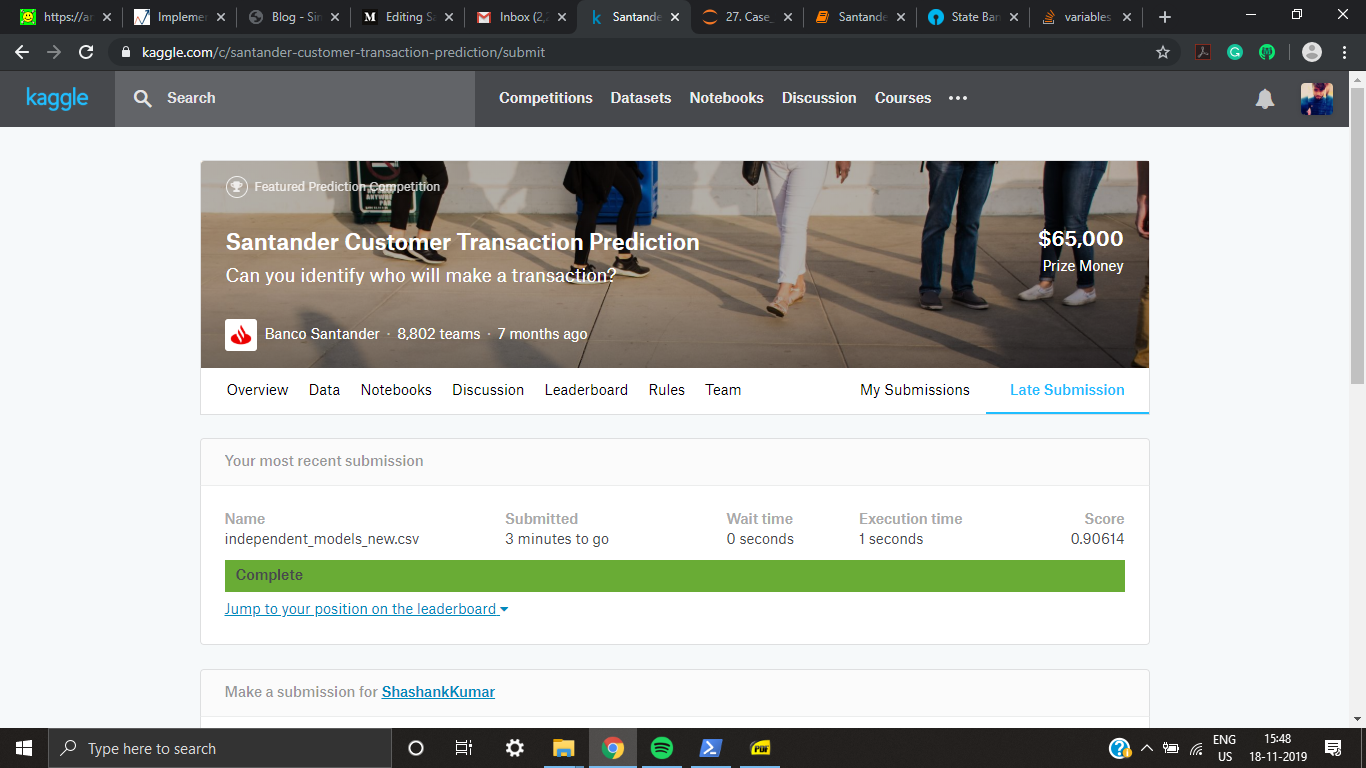

In [2]:
from IPython.display import Image
Image(filename='SS/submission.png')

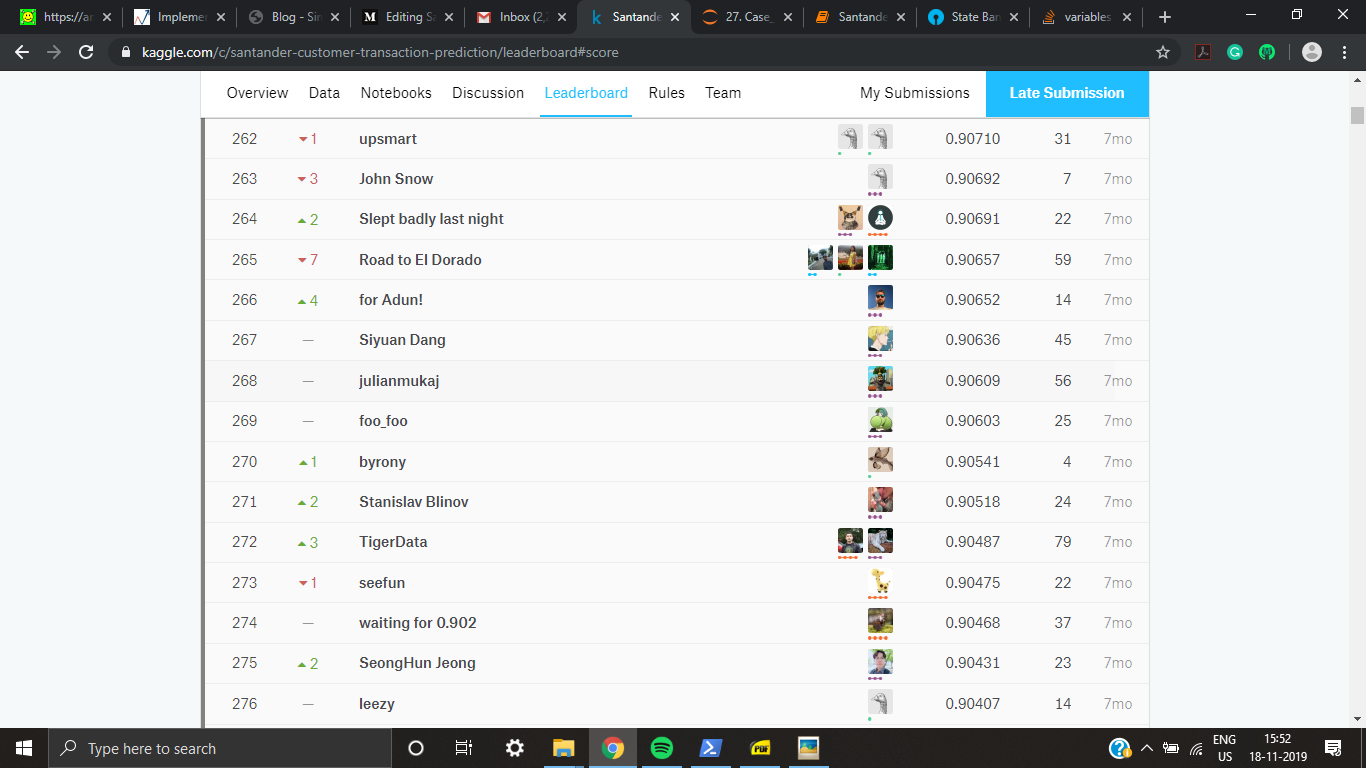

In [3]:
Image(filename='SS/leaderboard.png')

# Result Table

In [4]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = [ "Model","Hyperparameter Tuning","Class Balance Technique","Train_ROC_AUC_Score",'Test_ROC_AUC_Score']
x.add_row(['Random Forest Model without FE',"No","No",'1.0','0.825'])
x.add_row(['XGBoost Model without FE',"Random Search CV","No",'0.950','0.892'])
x.add_row(['XGBoost Model with FE',"Random Search CV","Class Weights",'0.953','0.896'])
x.add_row(['LightGBM Model with FE',"Bayesian Optimization","Data Augmentation",'0.927','0.898'])
print(x)

+--------------------------------+-----------------------+-------------------------+---------------------+--------------------+
|             Model              | Hyperparameter Tuning | Class Balance Technique | Train_ROC_AUC_Score | Test_ROC_AUC_Score |
+--------------------------------+-----------------------+-------------------------+---------------------+--------------------+
| Random Forest Model without FE |           No          |            No           |         1.0         |       0.825        |
|    XGBoost Model without FE    |    Random Search CV   |            No           |        0.950        |       0.892        |
|     XGBoost Model with FE      |    Random Search CV   |      Class Weights      |        0.953        |       0.896        |
|     LightGBM Model with FE     | Bayesian Optimization |    Data Augmentation    |        0.927        |       0.898        |
+--------------------------------+-----------------------+-------------------------+--------------------

# Conclusion

* We have an anonymized dataset of 200,000 data points with 202 features in which 200 features are numerical 
* From EDA we know that data is highly imbalanced, there is no missing value in data, there are very small no. of outliers, there is very low correlation between each features
* Firstly we build models without any feature engineering 
* First model we trained is Random Forest model with no hyperparameter tuning, result of this model shows overfitting as we got 1.0 ROC AUC Score
* Secondly We trained XGBoost model with Random SearchCV, it show much better result as compared to Random Forest but still there is huge gap between training and testing ROC 
* Now we have done some feature Engineering by adding some Statistical Features and added more 200 features with value counts for each data point in the feature after this feature engineering we have 408 features to train model on
* For test data value counts features are created only using 100,000 data as these are the real data other 100,000 data are fake or synthetic data to make results more complicated
* First Model we trained after Feature engineering was the same XGBoose model with Random SearchCV but this time it is with class weight balancing Technique, there is not much improvement from the previous XGBoost Model but we have slighly incresed the test ROC AUC Score
* Second Model we trained was LightGBM with Bayesian Optimization and Data Augmentation Technique for handling imbalanced data and the result of this model is very mesmerizing the gap between training and test ROC AUC Score is very small and no. of True positive's are also highest in this model 
* So the best result came from the LightGBM Model which shows the power of state of the art bayesian optimization and data augmentation techniques 
* Best Train and Test ROC AUC Scores are 0.927 and 0.898
* For submission of result to kaggle we trained 2 models with complete training data 1. LightGBM with complete training data 2. As Correlation EDA shows features are nearly independent so we trained 200 independent models with var_i and freq_i 
* After Submission Independent Models technique is giving better result on kaggle leaderboard with 0.906 Score and a silver medal 
